# Multi-Store Fashion Retail Sales Analysis - EDA
## January 2024 Exploratory Data Analysis

**Analyst**: Data Analysis Team

**Date**: October 2025

**Objective**: Conduct comprehensive exploratory analysis of sales data from 8 fashion retail stores across Japan to identify seasonal patterns, emerging trends, and performance insights.

---

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization parameters for high-quality charts
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')
sns.set_palette('Set2')

print("Libraries loaded successfully")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

Libraries loaded successfully
pandas version: 2.3.2
numpy version: 1.24.2


In [2]:
# Define file paths
DATA_DIR = Path('../data/processed')
REPORTS_DIR = Path('../reports/assets')

# Create reports/assets directory if it doesn't exist
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

# Load processed datasets
sales_df = pd.read_csv(DATA_DIR / 'sales_clean.csv', parse_dates=['date'])
stores_df = pd.read_csv(DATA_DIR / 'stores.csv')
products_df = pd.read_csv(DATA_DIR / 'products.csv')

print("Data loaded successfully!")
print(f"\nSales transactions: {len(sales_df):,} rows")
print(f"Stores: {len(stores_df)} stores")
print(f"Product categories: {len(products_df)} categories")

Data loaded successfully!

Sales transactions: 928 rows
Stores: 10 stores
Product categories: 5 categories


## 2. Data Overview and Quality Check

In [3]:
# Display first few rows of each dataset
print("="*80)
print("SALES DATA SAMPLE")
print("="*80)
display(sales_df.head(10))

print("\n" + "="*80)
print("STORES DATA")
print("="*80)
display(stores_df)

print("\n" + "="*80)
print("PRODUCTS DATA")
print("="*80)
display(products_df)

SALES DATA SAMPLE


,transaction_id,date,store_id,product_category,sales_amount,quantity,day_of_week,day_of_month,is_weekend,week_of_month
0,S01_20240121_0000,2024-01-21,S01,Footwear,34024.0,2.0,Sunday,21,True,3
1,S01_20240118_0000,2024-01-18,S01,Women's Apparel,38444.0,4.0,Thursday,18,False,3
2,S01_20240125_0000,2024-01-25,S01,Women's Apparel,34722.0,3.0,Thursday,25,False,4
3,S01_20240104_0000,2024-01-04,S01,Footwear,33507.0,3.0,Thursday,4,False,1
4,S01_20240107_0000,2024-01-07,S01,Footwear,46401.0,3.0,Sunday,7,True,1
5,S01_20240128_0000,2024-01-28,S01,Footwear,68432.0,4.0,Sunday,28,True,4
6,S01_20240106_0000,2024-01-06,S01,Men's Apparel,22296.0,3.0,Saturday,6,True,1
7,S01_20240121_0001,2024-01-21,S01,Footwear,68035.0,5.0,Sunday,21,True,3
8,S01_20240115_0000,2024-01-15,S01,Kids,36210.0,5.0,Monday,15,False,3
9,S01_20240127_0000,2024-01-27,S01,Footwear,27153.0,3.0,Saturday,27,True,4



STORES DATA


,store_id,store_name_jp,store_name_en,city,region
0,S01,渋谷店,Shibuya,Tokyo,Kanto
1,S02,新宿店,Shinjuku,Tokyo,Kanto
2,S03,池袋店,Ikebukuro,Tokyo,Kanto
3,S04,横浜店,Yokohama,Yokohama,Kanto
4,S05,大阪店,Osaka,Osaka,Kansai
5,S06,札幌店,Sapporo,Sapporo,Hokkaido
6,S07,仙台店,Sendai,Sendai,Tohoku
7,S08,名古屋店,Nagoya,Nagoya,Chubu
8,S09,広島店,Hiroshima,Hiroshima,Chugoku
9,S10,福岡店,Fukuoka,Fukuoka,Kyushu



PRODUCTS DATA


,category_id,category_name_en,category_name_jp
0,C01,Accessories,アクセサリー
1,C02,Footwear,シューズ
2,C03,Kids,キッズ
3,C04,Men's Apparel,メンズ
4,C05,Women's Apparel,レディース


In [4]:
# Check data types and info
print("="*80)
print("SALES DATA INFO")
print("="*80)
sales_df.info()

print("\n" + "="*80)
print("MISSING VALUES CHECK")
print("="*80)
missing = sales_df.isnull().sum()
missing_pct = (missing / len(sales_df) * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
display(missing_summary[missing_summary['Missing Count'] > 0])

print("\nNote: quantity field has some missing values, which is acceptable per data requirements.")

SALES DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    928 non-null    object        
 1   date              928 non-null    datetime64[ns]
 2   store_id          928 non-null    object        
 3   product_category  928 non-null    object        
 4   sales_amount      928 non-null    float64       
 5   quantity          928 non-null    float64       
 6   day_of_week       928 non-null    object        
 7   day_of_month      928 non-null    int64         
 8   is_weekend        928 non-null    bool          
 9   week_of_month     928 non-null    int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 66.3+ KB

MISSING VALUES CHECK


,Missing Count,Percentage



Note: quantity field has some missing values, which is acceptable per data requirements.


In [5]:
# Statistical summary of sales data
print("="*80)
print("STATISTICAL SUMMARY")
print("="*80)
display(sales_df[['sales_amount', 'quantity', 'day_of_month', 'week_of_month']].describe())

STATISTICAL SUMMARY


,sales_amount,quantity,day_of_month,week_of_month
count,928.000000,928.000000,928.000000,928.000000
mean,37580.167026,3.004310,15.332974,2.664871
std,28044.200374,1.400409,8.931485,1.289228
min,2079.000000,1.000000,1.000000,1.000000
25%,15911.750000,2.000000,8.000000,2.000000
50%,29707.500000,3.000000,15.000000,3.000000
75%,54801.000000,4.000000,23.000000,4.000000
max,136595.000000,5.000000,31.000000,5.000000


## 3. Business Metrics Overview

In [6]:
# Calculate key business metrics
total_revenue = sales_df['sales_amount'].sum()
total_transactions = len(sales_df)
avg_transaction_value = sales_df['sales_amount'].mean()
median_transaction_value = sales_df['sales_amount'].median()
num_stores_with_sales = sales_df['store_id'].nunique()
date_range = f"{sales_df['date'].min().strftime('%Y-%m-%d')} to {sales_df['date'].max().strftime('%Y-%m-%d')}"

print("="*80)
print("KEY BUSINESS METRICS - JANUARY 2024")
print("="*80)
print(f"Total Revenue:              ¥{total_revenue:,.0f}")
print(f"Total Transactions:         {total_transactions:,}")
print(f"Average Transaction Value:  ¥{avg_transaction_value:,.0f}")
print(f"Median Transaction Value:   ¥{median_transaction_value:,.0f}")
print(f"Active Stores:              {num_stores_with_sales} out of 10")
print(f"Date Range:                 {date_range}")
print(f"Days in Period:             {sales_df['date'].dt.date.nunique()} days")

KEY BUSINESS METRICS - JANUARY 2024
Total Revenue:              ¥34,874,395
Total Transactions:         928
Average Transaction Value:  ¥37,580
Median Transaction Value:   ¥29,708
Active Stores:              8 out of 10
Date Range:                 2024-01-01 to 2024-01-31
Days in Period:             31 days


## 4. Store Performance Analysis

In [7]:
# Merge sales with store information
sales_with_stores = sales_df.merge(stores_df, on='store_id', how='left')

# Revenue by store
store_revenue = sales_with_stores.groupby(['store_id', 'store_name_en', 'region']).agg({
    'sales_amount': ['sum', 'mean', 'count']
}).reset_index()

store_revenue.columns = ['store_id', 'store_name', 'region', 'total_revenue', 'avg_transaction', 'num_transactions']
store_revenue = store_revenue.sort_values('total_revenue', ascending=False)
store_revenue['revenue_share_pct'] = (store_revenue['total_revenue'] / store_revenue['total_revenue'].sum() * 100).round(2)

print("="*80)
print("REVENUE BY STORE (Ranked)")
print("="*80)
display(store_revenue)

REVENUE BY STORE (Ranked)


,store_id,store_name,region,total_revenue,avg_transaction,num_transactions,revenue_share_pct
3,S05,Osaka,Kansai,5202653.0,37975.569343,137,14.92
5,S07,Sendai,Tohoku,4665006.0,39201.731092,119,13.38
2,S04,Yokohama,Kanto,4485443.0,38337.119658,117,12.86
6,S08,Nagoya,Chubu,4480324.0,37968.847458,118,12.85
0,S01,Shibuya,Kanto,4423613.0,34291.573643,129,12.68
7,S09,Hiroshima,Chugoku,4085208.0,32422.285714,126,11.71
1,S02,Shinjuku,Kanto,3857094.0,42856.600000,90,11.06
4,S06,Sapporo,Hokkaido,3675054.0,39946.239130,92,10.54


In [8]:
# Revenue by region
region_revenue = sales_with_stores.groupby('region').agg({
    'sales_amount': ['sum', 'mean', 'count'],
    'store_id': 'nunique'
}).reset_index()

region_revenue.columns = ['region', 'total_revenue', 'avg_transaction', 'num_transactions', 'num_stores']
region_revenue = region_revenue.sort_values('total_revenue', ascending=False)
region_revenue['revenue_share_pct'] = (region_revenue['total_revenue'] / region_revenue['total_revenue'].sum() * 100).round(2)

print("\n" + "="*80)
print("REVENUE BY REGION (Ranked)")
print("="*80)
display(region_revenue)


REVENUE BY REGION (Ranked)


,region,total_revenue,avg_transaction,num_transactions,num_stores,revenue_share_pct
4,Kanto,12766150.0,37994.494048,336,3,36.61
3,Kansai,5202653.0,37975.569343,137,1,14.92
5,Tohoku,4665006.0,39201.731092,119,1,13.38
0,Chubu,4480324.0,37968.847458,118,1,12.85
1,Chugoku,4085208.0,32422.285714,126,1,11.71
2,Hokkaido,3675054.0,39946.239130,92,1,10.54


## 5. Product Category Analysis

In [9]:
# Revenue by product category
category_revenue = sales_df.groupby('product_category').agg({
    'sales_amount': ['sum', 'mean', 'count']
}).reset_index()

category_revenue.columns = ['category', 'total_revenue', 'avg_transaction', 'num_transactions']
category_revenue = category_revenue.sort_values('total_revenue', ascending=False)
category_revenue['revenue_share_pct'] = (category_revenue['total_revenue'] / category_revenue['total_revenue'].sum() * 100).round(2)

print("="*80)
print("REVENUE BY PRODUCT CATEGORY")
print("="*80)
display(category_revenue)

REVENUE BY PRODUCT CATEGORY


,category,total_revenue,avg_transaction,num_transactions,revenue_share_pct
1,Footwear,10130021.0,51421.426396,197,29.05
0,Accessories,9903000.0,49515.000000,200,28.40
4,Women's Apparel,6589916.0,39698.289157,166,18.90
3,Men's Apparel,5417932.0,29768.857143,182,15.54
2,Kids,2833526.0,15483.748634,183,8.12


In [10]:
# Category performance by store
category_by_store = sales_with_stores.groupby(['store_name_en', 'product_category'])['sales_amount'].sum().unstack(fill_value=0)

print("\n" + "="*80)
print("CATEGORY REVENUE BY STORE (¥)")
print("="*80)
display(category_by_store.style.format('¥{:,.0f}'))


CATEGORY REVENUE BY STORE (¥)


product_category,Accessories,Footwear,Kids,Men's Apparel,Women's Apparel
store_name_en,,,,,
Hiroshima,"¥1,142,632","¥1,004,830","¥409,967","¥800,496","¥727,283"
Nagoya,"¥1,223,793","¥1,301,020","¥414,673","¥663,302","¥877,536"
Osaka,"¥1,633,297","¥1,216,373","¥458,193","¥908,606","¥986,184"
Sapporo,"¥1,223,494","¥1,044,167","¥260,552","¥481,364","¥665,477"
Sendai,"¥1,155,301","¥1,596,063","¥330,742","¥628,531","¥954,369"
Shibuya,"¥935,554","¥1,512,752","¥433,389","¥655,155","¥886,763"
Shinjuku,"¥1,316,053","¥1,073,639","¥194,649","¥618,803","¥653,950"
Yokohama,"¥1,272,876","¥1,381,177","¥331,361","¥661,675","¥838,354"


## 6. Temporal Pattern Analysis

In [11]:
# Daily revenue trend
daily_revenue = sales_df.groupby('date')['sales_amount'].sum().reset_index()
daily_revenue.columns = ['date', 'revenue']

print("="*80)
print("DAILY REVENUE STATISTICS")
print("="*80)
print(f"Average Daily Revenue:    ¥{daily_revenue['revenue'].mean():,.0f}")
print(f"Median Daily Revenue:     ¥{daily_revenue['revenue'].median():,.0f}")
print(f"Highest Daily Revenue:    ¥{daily_revenue['revenue'].max():,.0f} on {daily_revenue.loc[daily_revenue['revenue'].idxmax(), 'date'].strftime('%Y-%m-%d')}")
print(f"Lowest Daily Revenue:     ¥{daily_revenue['revenue'].min():,.0f} on {daily_revenue.loc[daily_revenue['revenue'].idxmin(), 'date'].strftime('%Y-%m-%d')}")

display(daily_revenue.head(10))

DAILY REVENUE STATISTICS
Average Daily Revenue:    ¥1,124,980
Median Daily Revenue:     ¥1,061,240
Highest Daily Revenue:    ¥2,161,334 on 2024-01-03
Lowest Daily Revenue:     ¥561,501 on 2024-01-19


,date,revenue
0,2024-01-01,1108135.0
1,2024-01-02,1216386.0
2,2024-01-03,2161334.0
3,2024-01-04,998304.0
4,2024-01-05,1451759.0
5,2024-01-06,744521.0
6,2024-01-07,929169.0
7,2024-01-08,1704993.0
8,2024-01-09,1119593.0
9,2024-01-10,1705648.0


In [12]:
# Day of week analysis
# Define proper day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dow_revenue = sales_df.groupby('day_of_week').agg({
    'sales_amount': ['sum', 'mean', 'count']
}).reset_index()

dow_revenue.columns = ['day_of_week', 'total_revenue', 'avg_transaction', 'num_transactions']

# Sort by custom day order
dow_revenue['day_of_week'] = pd.Categorical(dow_revenue['day_of_week'], categories=day_order, ordered=True)
dow_revenue = dow_revenue.sort_values('day_of_week')

print("\n" + "="*80)
print("REVENUE BY DAY OF WEEK")
print("="*80)
display(dow_revenue)


REVENUE BY DAY OF WEEK


,day_of_week,total_revenue,avg_transaction,num_transactions
1,Monday,6498157.0,44507.924658,146
5,Tuesday,5466122.0,37439.191781,146
6,Wednesday,7603752.0,38597.725888,197
4,Thursday,5069629.0,39606.476562,128
0,Friday,3355266.0,34237.408163,98
2,Saturday,3428116.0,31741.814815,108
3,Sunday,3453353.0,32889.076190,105


In [13]:
# Weekend vs Weekday comparison
weekend_comparison = sales_df.groupby('is_weekend').agg({
    'sales_amount': ['sum', 'mean', 'count']
}).reset_index()

weekend_comparison.columns = ['is_weekend', 'total_revenue', 'avg_transaction', 'num_transactions']
weekend_comparison['period'] = weekend_comparison['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

# Calculate average per day
weekend_days = sales_df[sales_df['is_weekend']]['date'].dt.date.nunique()
weekday_days = sales_df[~sales_df['is_weekend']]['date'].dt.date.nunique()

weekend_comparison['avg_revenue_per_day'] = weekend_comparison.apply(
    lambda row: row['total_revenue'] / (weekend_days if row['is_weekend'] else weekday_days), axis=1
)

print("\n" + "="*80)
print("WEEKEND vs WEEKDAY PERFORMANCE")
print("="*80)
display(weekend_comparison[['period', 'total_revenue', 'avg_transaction', 'num_transactions', 'avg_revenue_per_day']])

# Calculate weekend lift
weekend_avg = weekend_comparison[weekend_comparison['is_weekend']]['avg_revenue_per_day'].values[0]
weekday_avg = weekend_comparison[~weekend_comparison['is_weekend']]['avg_revenue_per_day'].values[0]
weekend_lift = ((weekend_avg - weekday_avg) / weekday_avg * 100)

print(f"\nWeekend Lift: {weekend_lift:+.1f}% higher average daily revenue than weekdays")


WEEKEND vs WEEKDAY PERFORMANCE


,period,total_revenue,avg_transaction,num_transactions,avg_revenue_per_day
0,Weekday,27992926.0,39150.945455,715,1.217084e+06
1,Weekend,6881469.0,32307.366197,213,8.601836e+05



Weekend Lift: -29.3% higher average daily revenue than weekdays


In [14]:
# Week of month analysis
week_revenue = sales_df.groupby('week_of_month').agg({
    'sales_amount': ['sum', 'mean', 'count']
}).reset_index()

week_revenue.columns = ['week_of_month', 'total_revenue', 'avg_transaction', 'num_transactions']

print("\n" + "="*80)
print("REVENUE BY WEEK OF MONTH")
print("="*80)
display(week_revenue)


REVENUE BY WEEK OF MONTH


,week_of_month,total_revenue,avg_transaction,num_transactions
0,1,8609608.0,38608.107623,223
1,2,8215445.0,37685.527523,218
2,3,7500121.0,33333.871111,225
3,4,7212151.0,42176.321637,171
4,5,3337070.0,36671.098901,91


## 7. Visualizations

Now we'll create professional visualizations to communicate our findings.

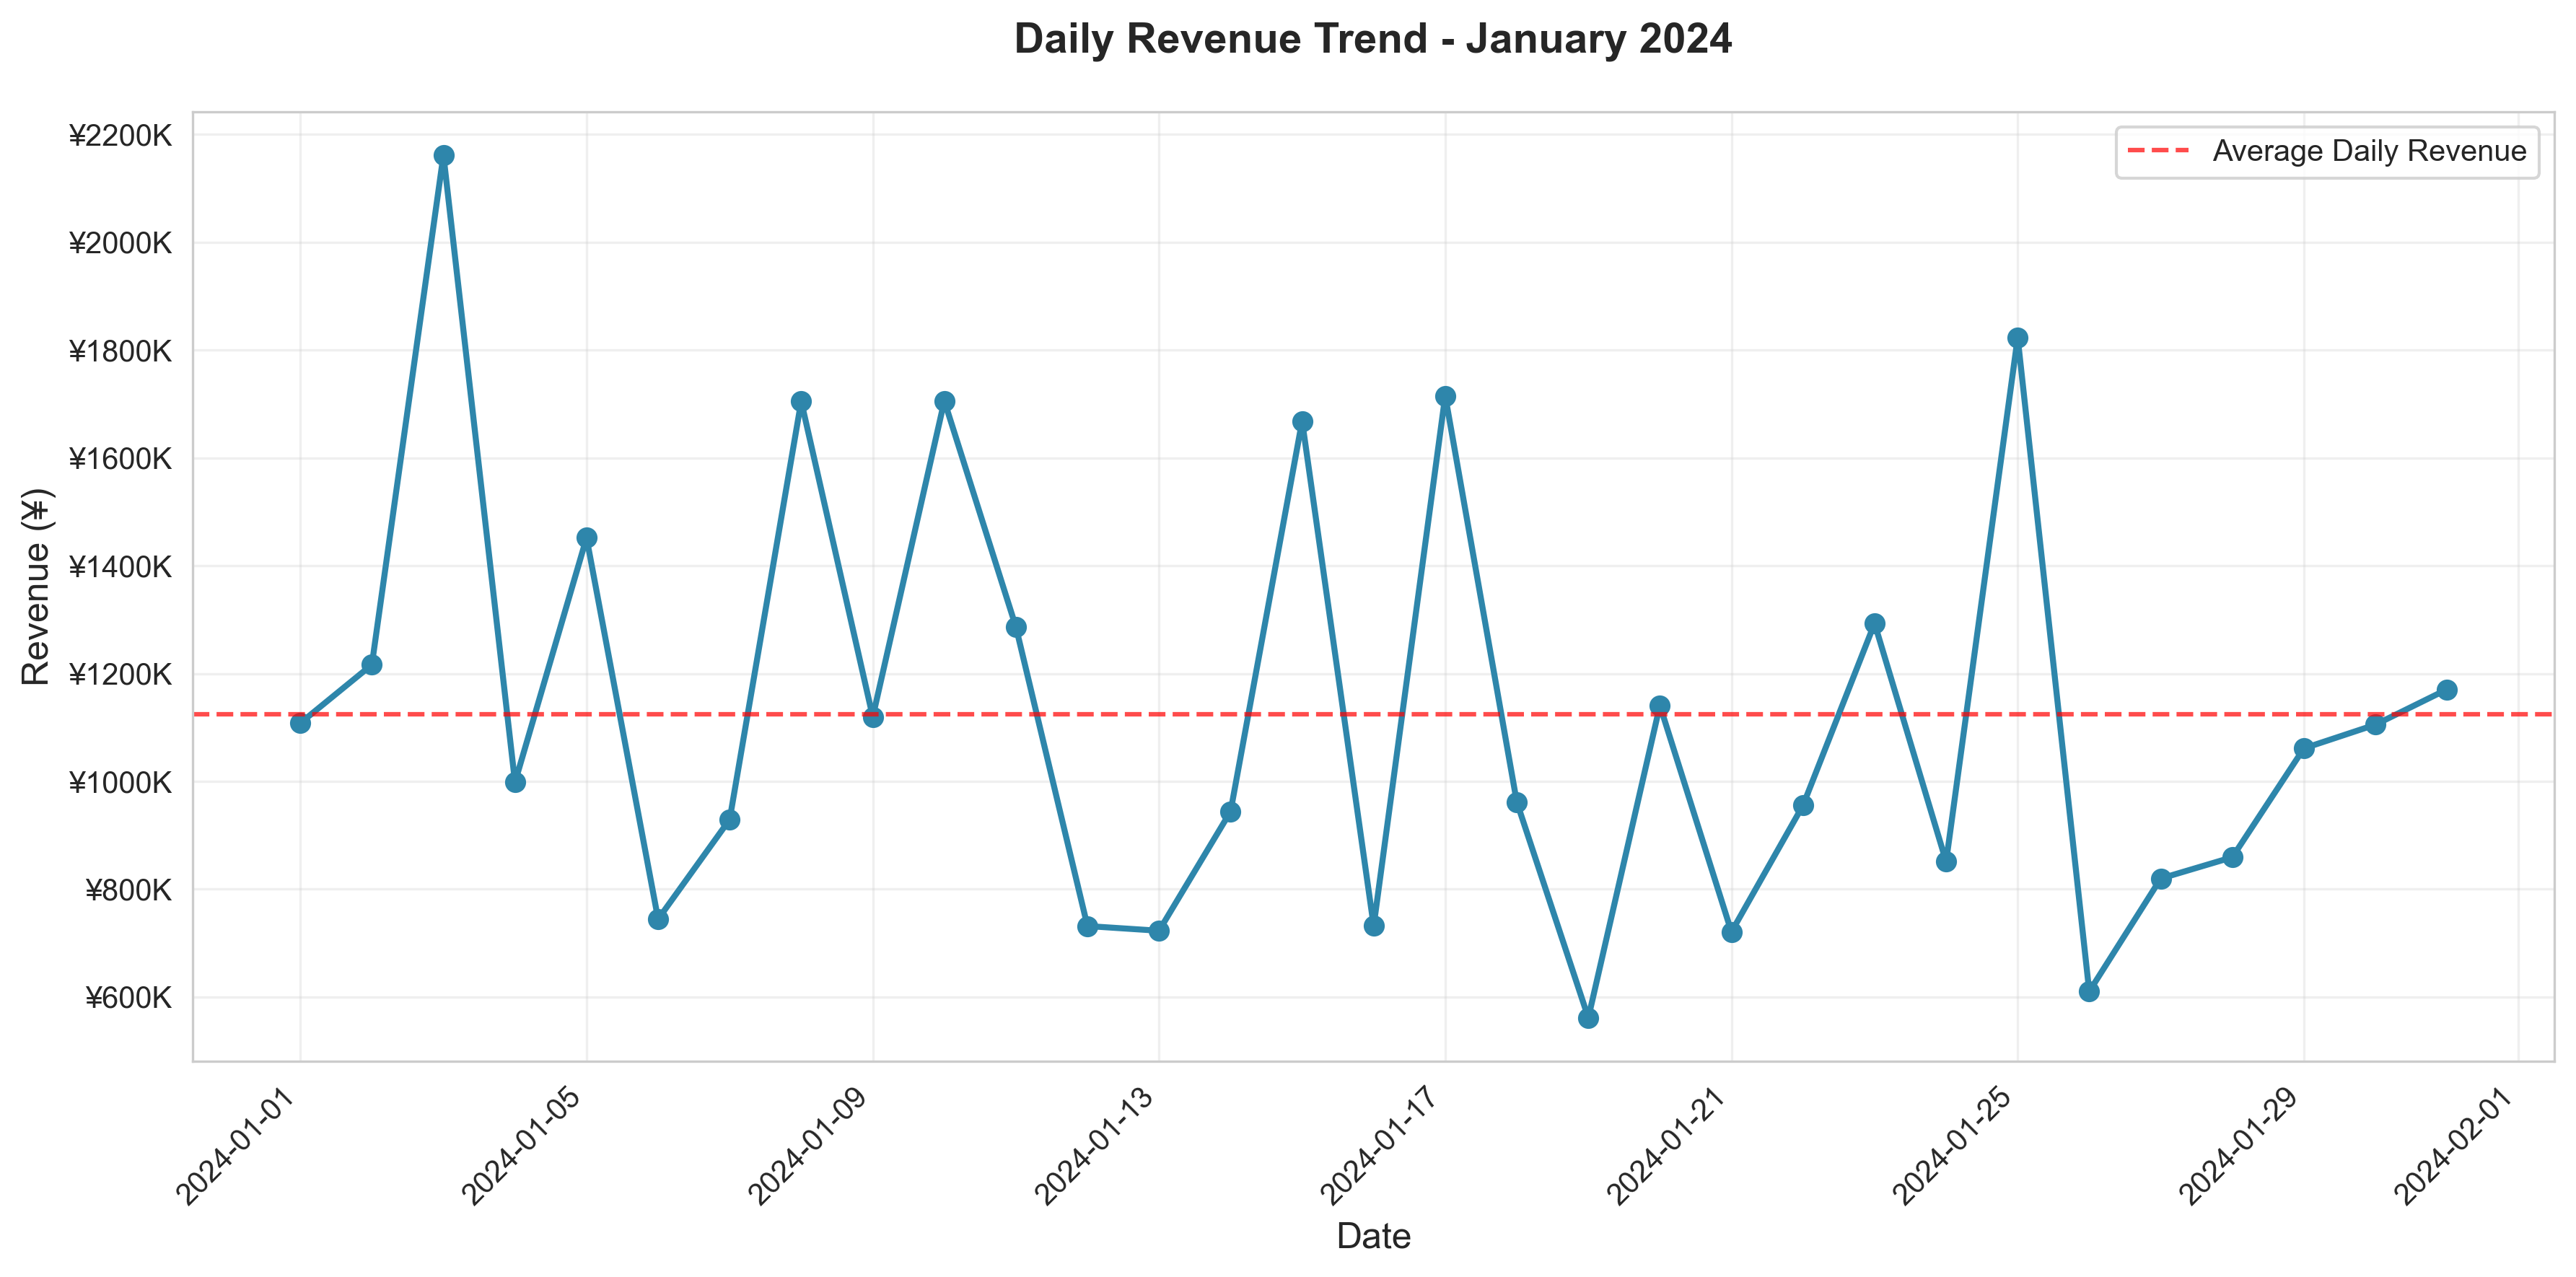

✓ Chart saved: daily_revenue_trend.png


In [15]:
# Visualization 1: Daily Revenue Trend
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(daily_revenue['date'], daily_revenue['revenue'], marker='o', linewidth=2, markersize=6, color='#2E86AB')
ax.axhline(y=daily_revenue['revenue'].mean(), color='red', linestyle='--', linewidth=1.5, label='Average Daily Revenue', alpha=0.7)

ax.set_title('Daily Revenue Trend - January 2024', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Revenue (¥)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'¥{x/1000:.0f}K'))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'daily_revenue_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved: daily_revenue_trend.png")

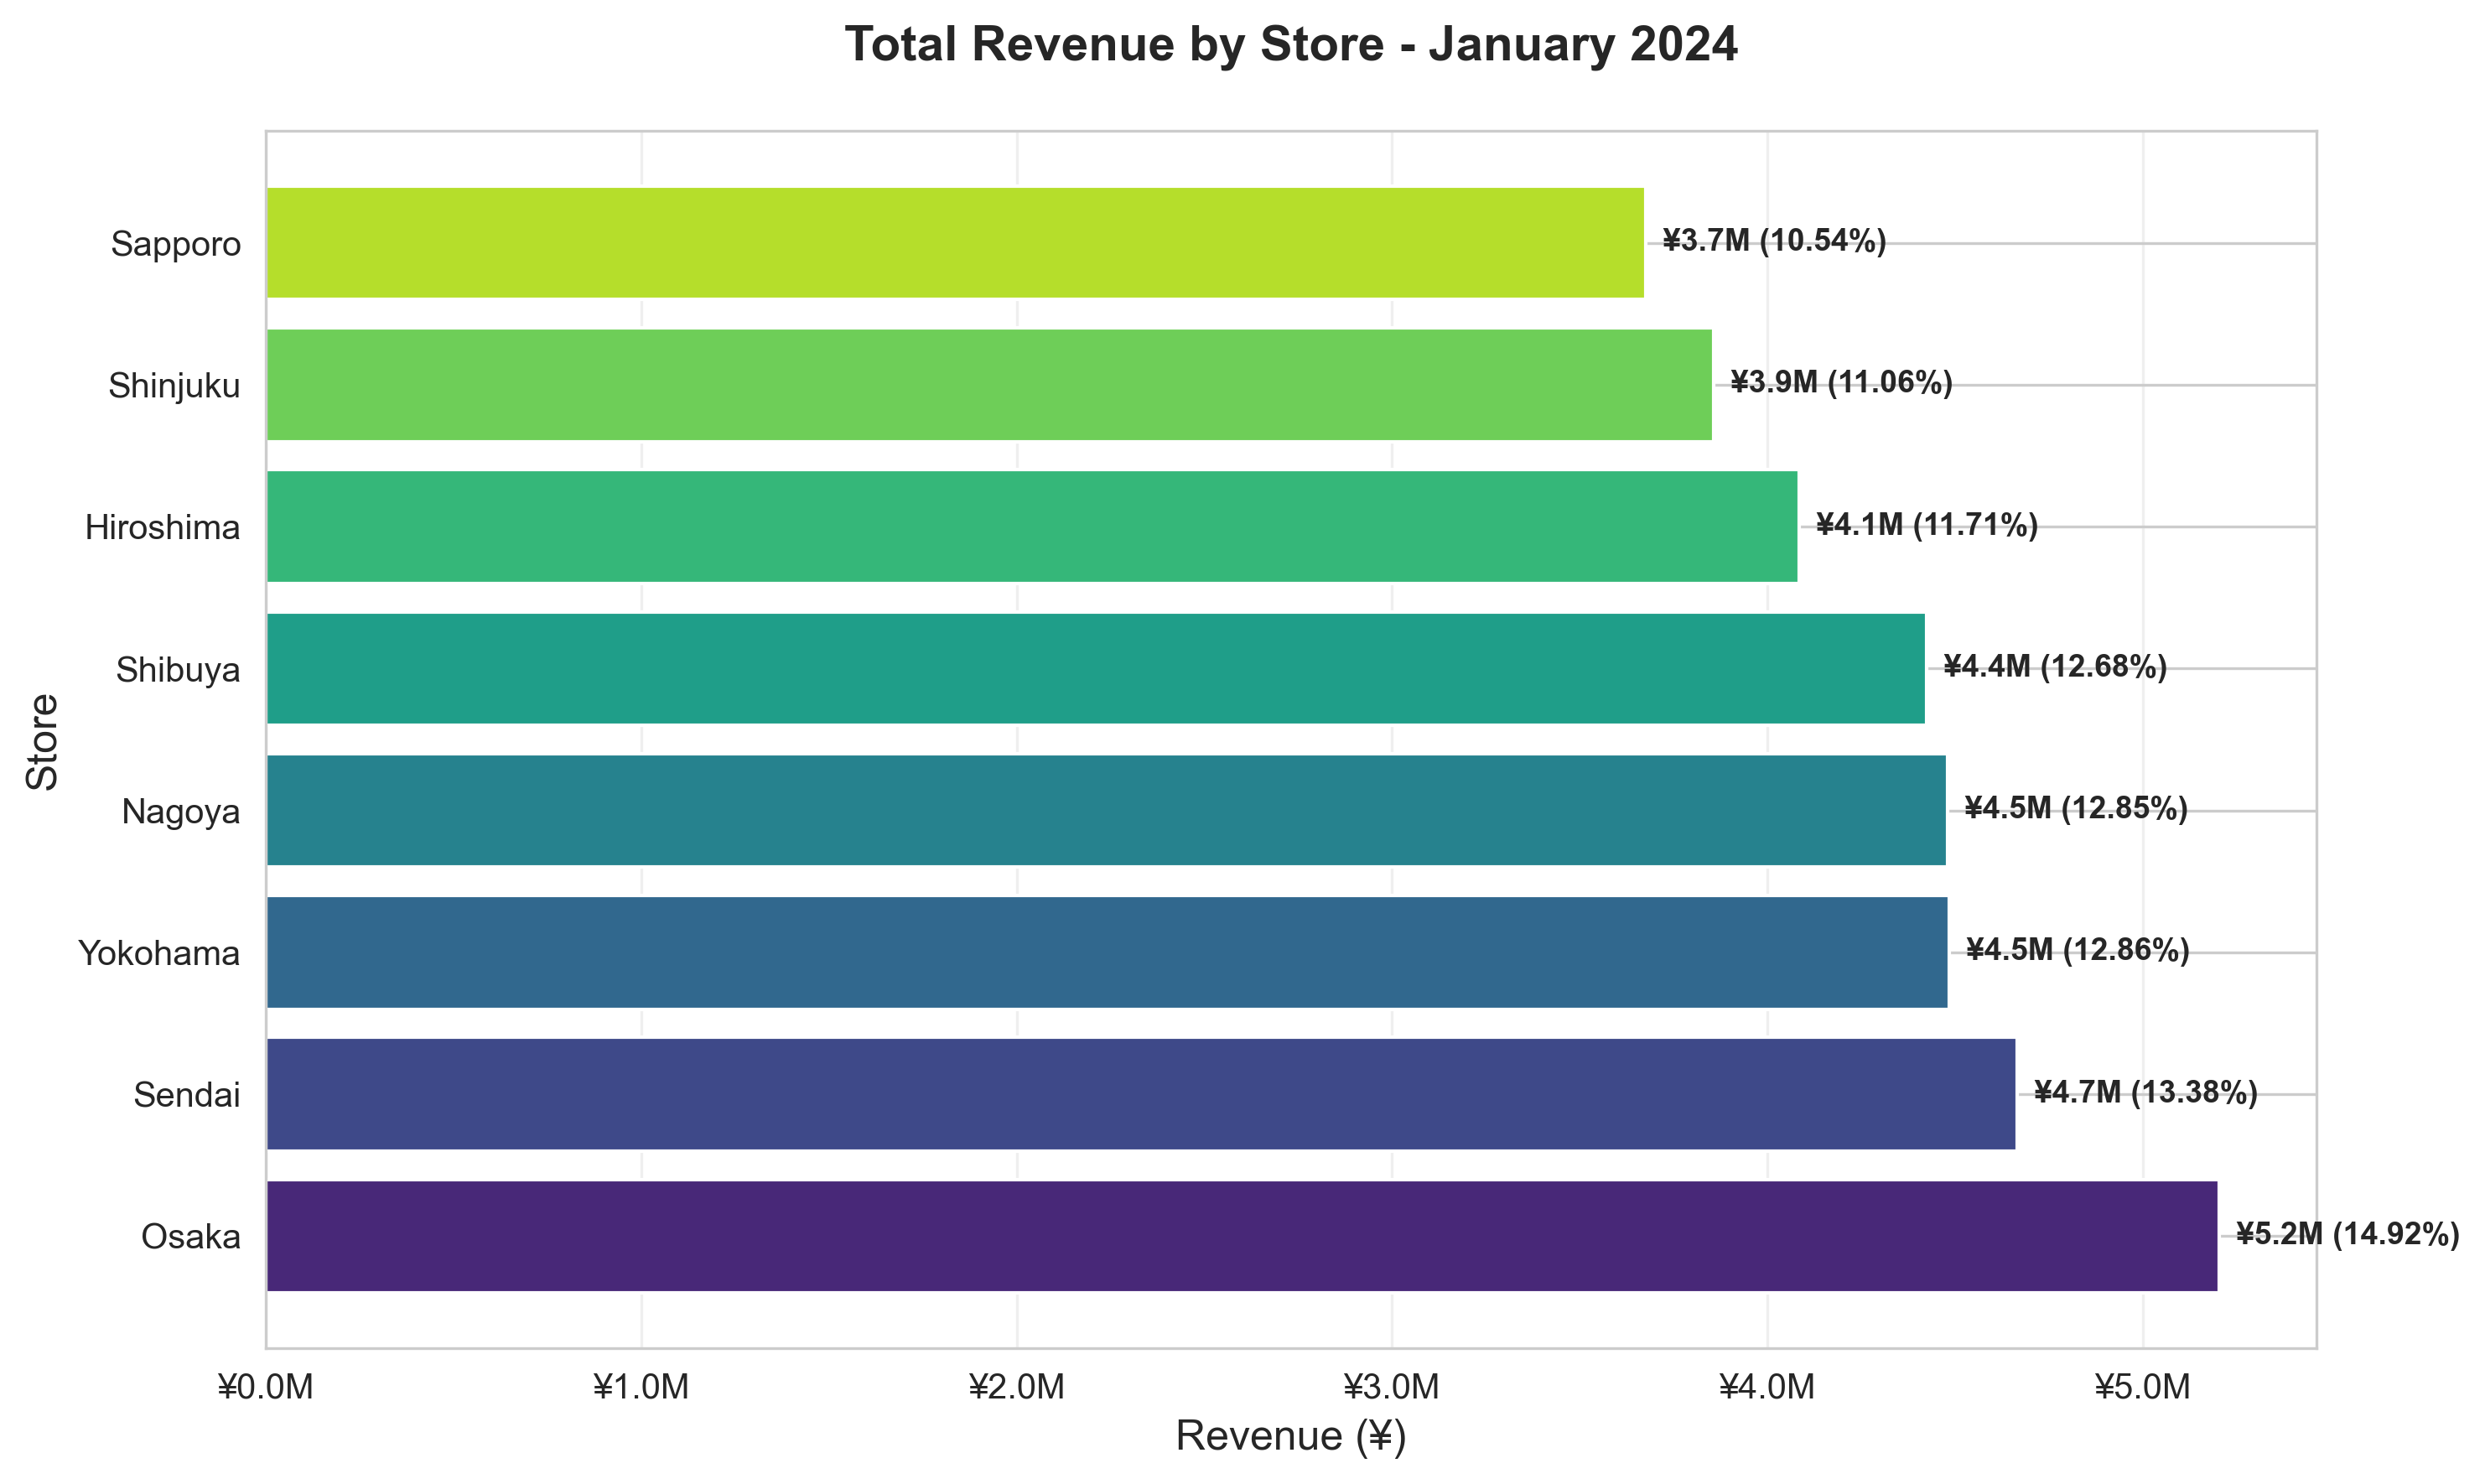

✓ Chart saved: revenue_by_store.png


In [16]:
# Visualization 2: Revenue by Store
fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette('viridis', len(store_revenue))
bars = ax.barh(store_revenue['store_name'], store_revenue['total_revenue'], color=colors)

# Add revenue labels on bars
for i, (bar, revenue, pct) in enumerate(zip(bars, store_revenue['total_revenue'], store_revenue['revenue_share_pct'])):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'  ¥{revenue/1000000:.1f}M ({pct}%)', 
            va='center', fontsize=9, fontweight='bold')

ax.set_title('Total Revenue by Store - January 2024', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Revenue (¥)', fontsize=12)
ax.set_ylabel('Store', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'¥{x/1000000:.1f}M'))
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(REPORTS_DIR / 'revenue_by_store.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved: revenue_by_store.png")

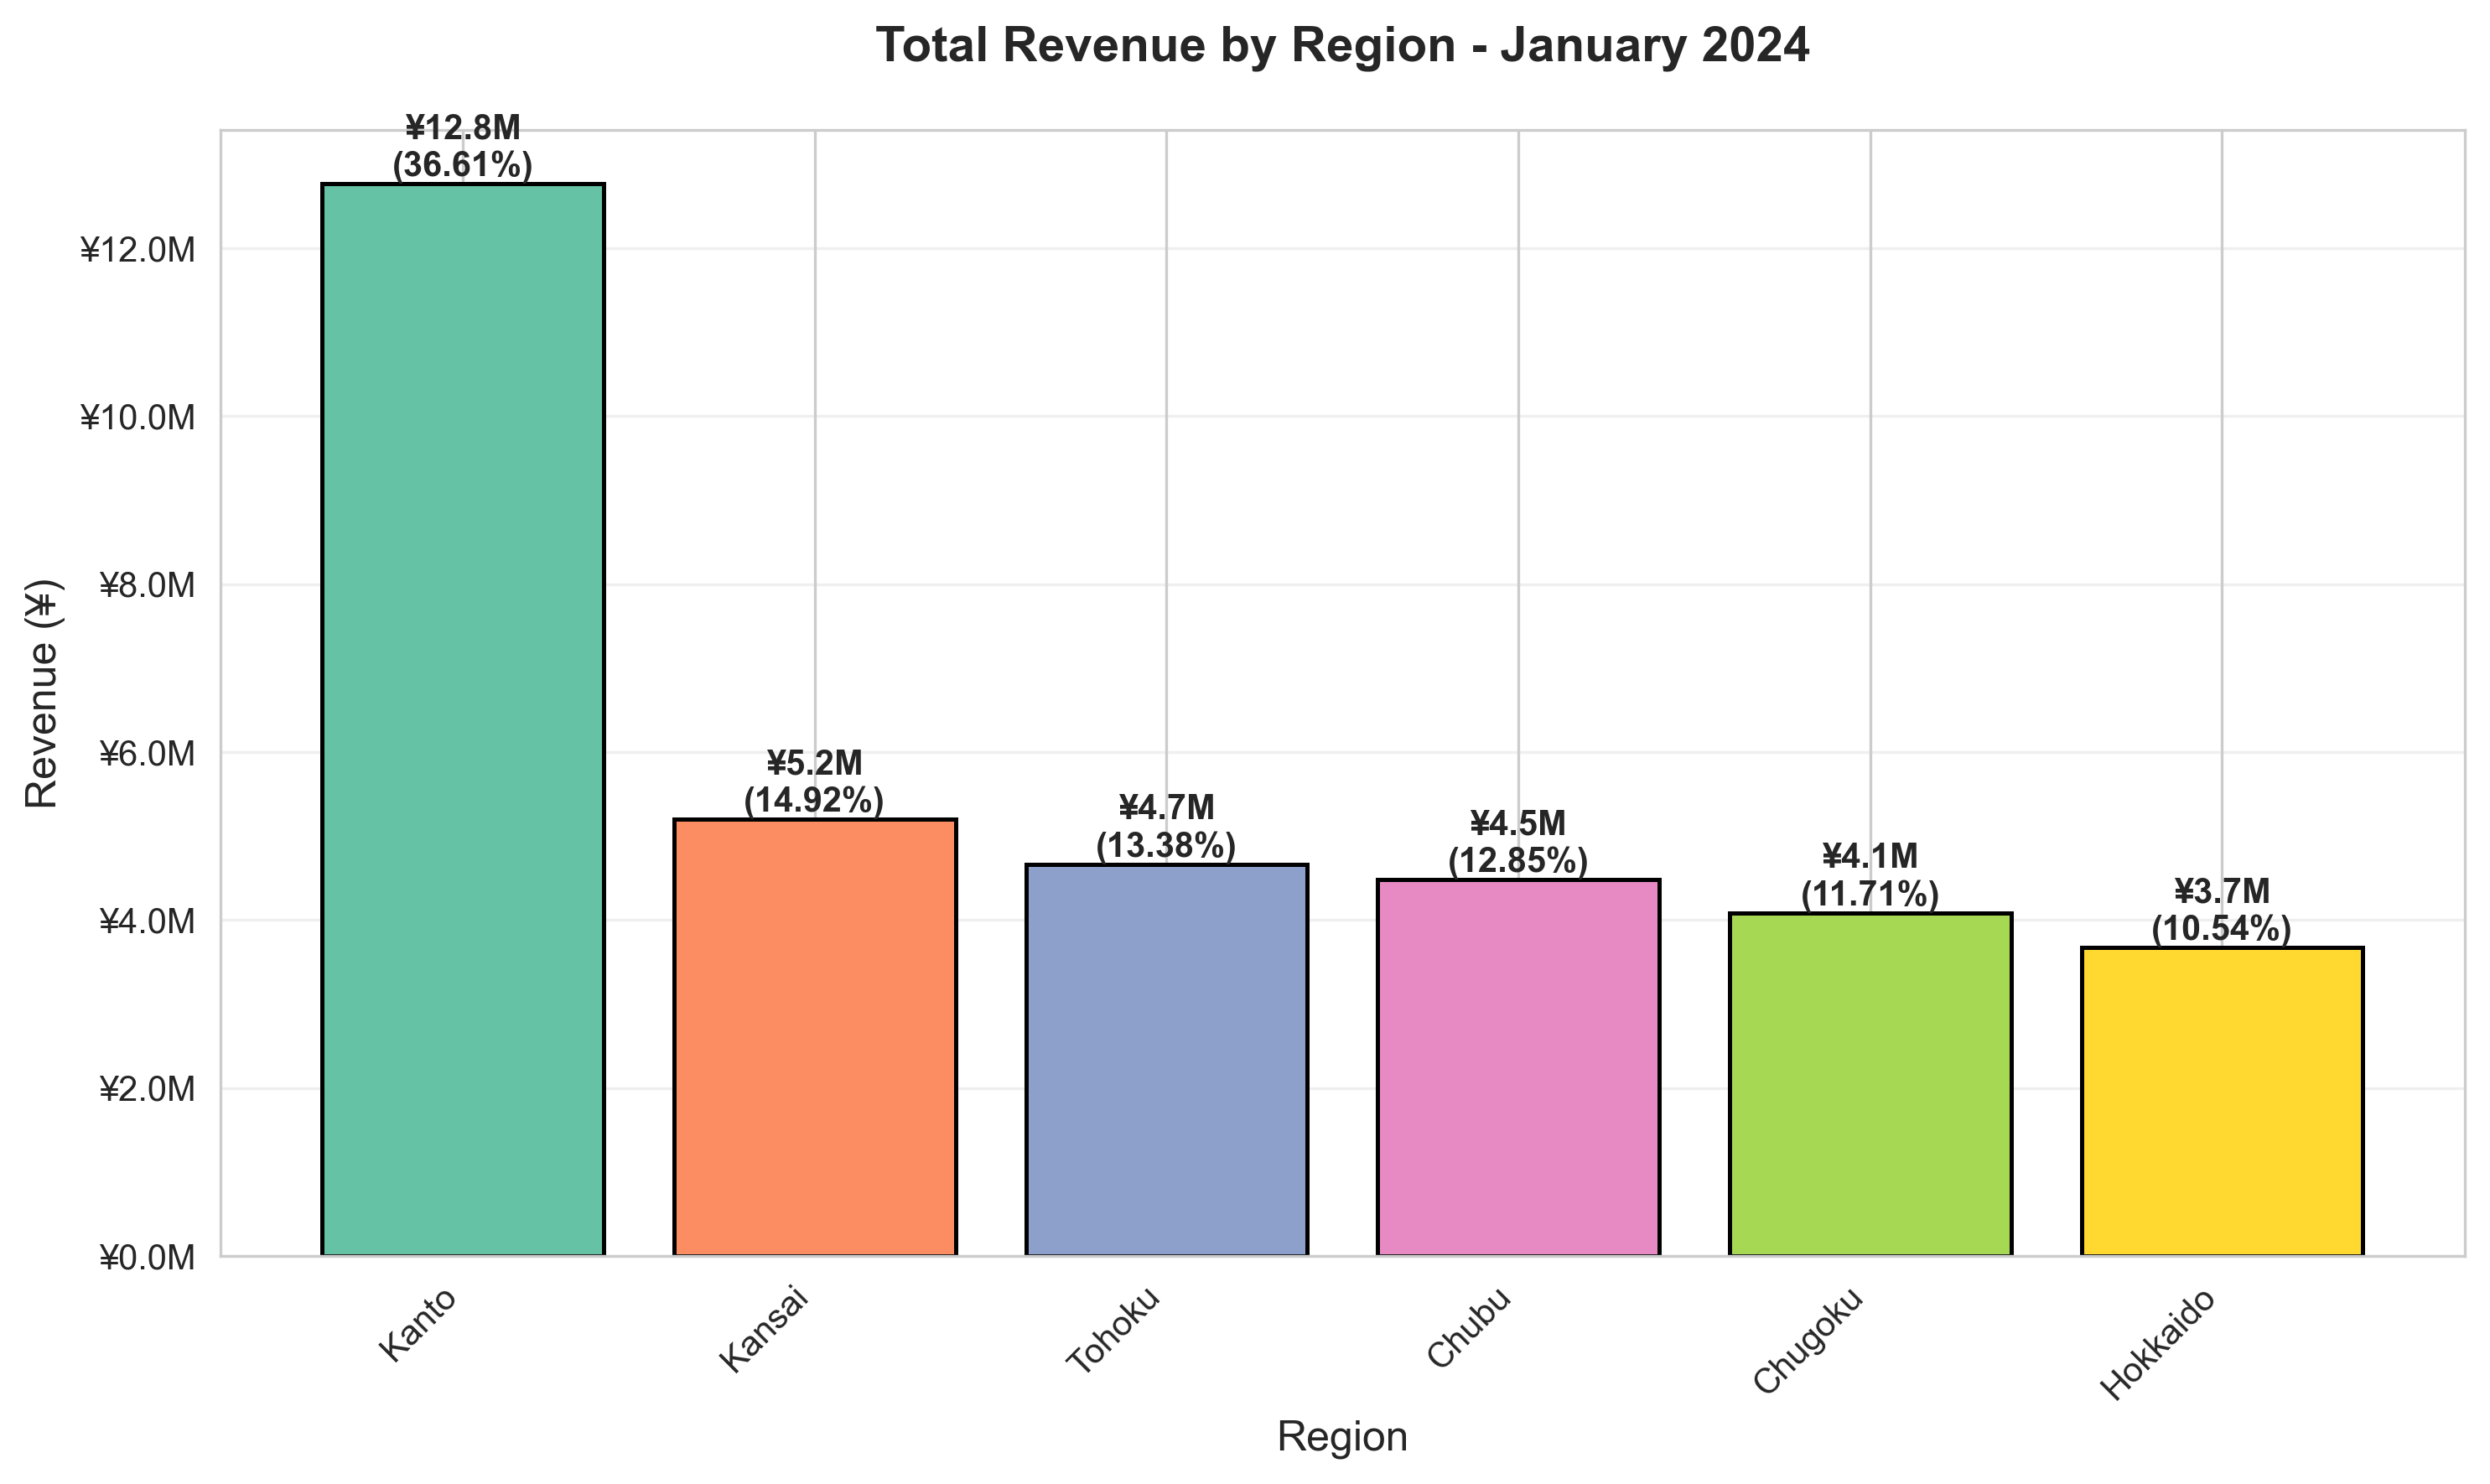

✓ Chart saved: revenue_by_region.png


In [17]:
# Visualization 3: Revenue by Region
fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette('Set2', len(region_revenue))
bars = ax.bar(region_revenue['region'], region_revenue['total_revenue'], color=colors, edgecolor='black', linewidth=1.2)

# Add revenue labels on bars
for bar, revenue, pct in zip(bars, region_revenue['total_revenue'], region_revenue['revenue_share_pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'¥{revenue/1000000:.1f}M\n({pct}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_title('Total Revenue by Region - January 2024', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Revenue (¥)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'¥{x/1000000:.1f}M'))
ax.grid(True, alpha=0.3, axis='y')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'revenue_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved: revenue_by_region.png")

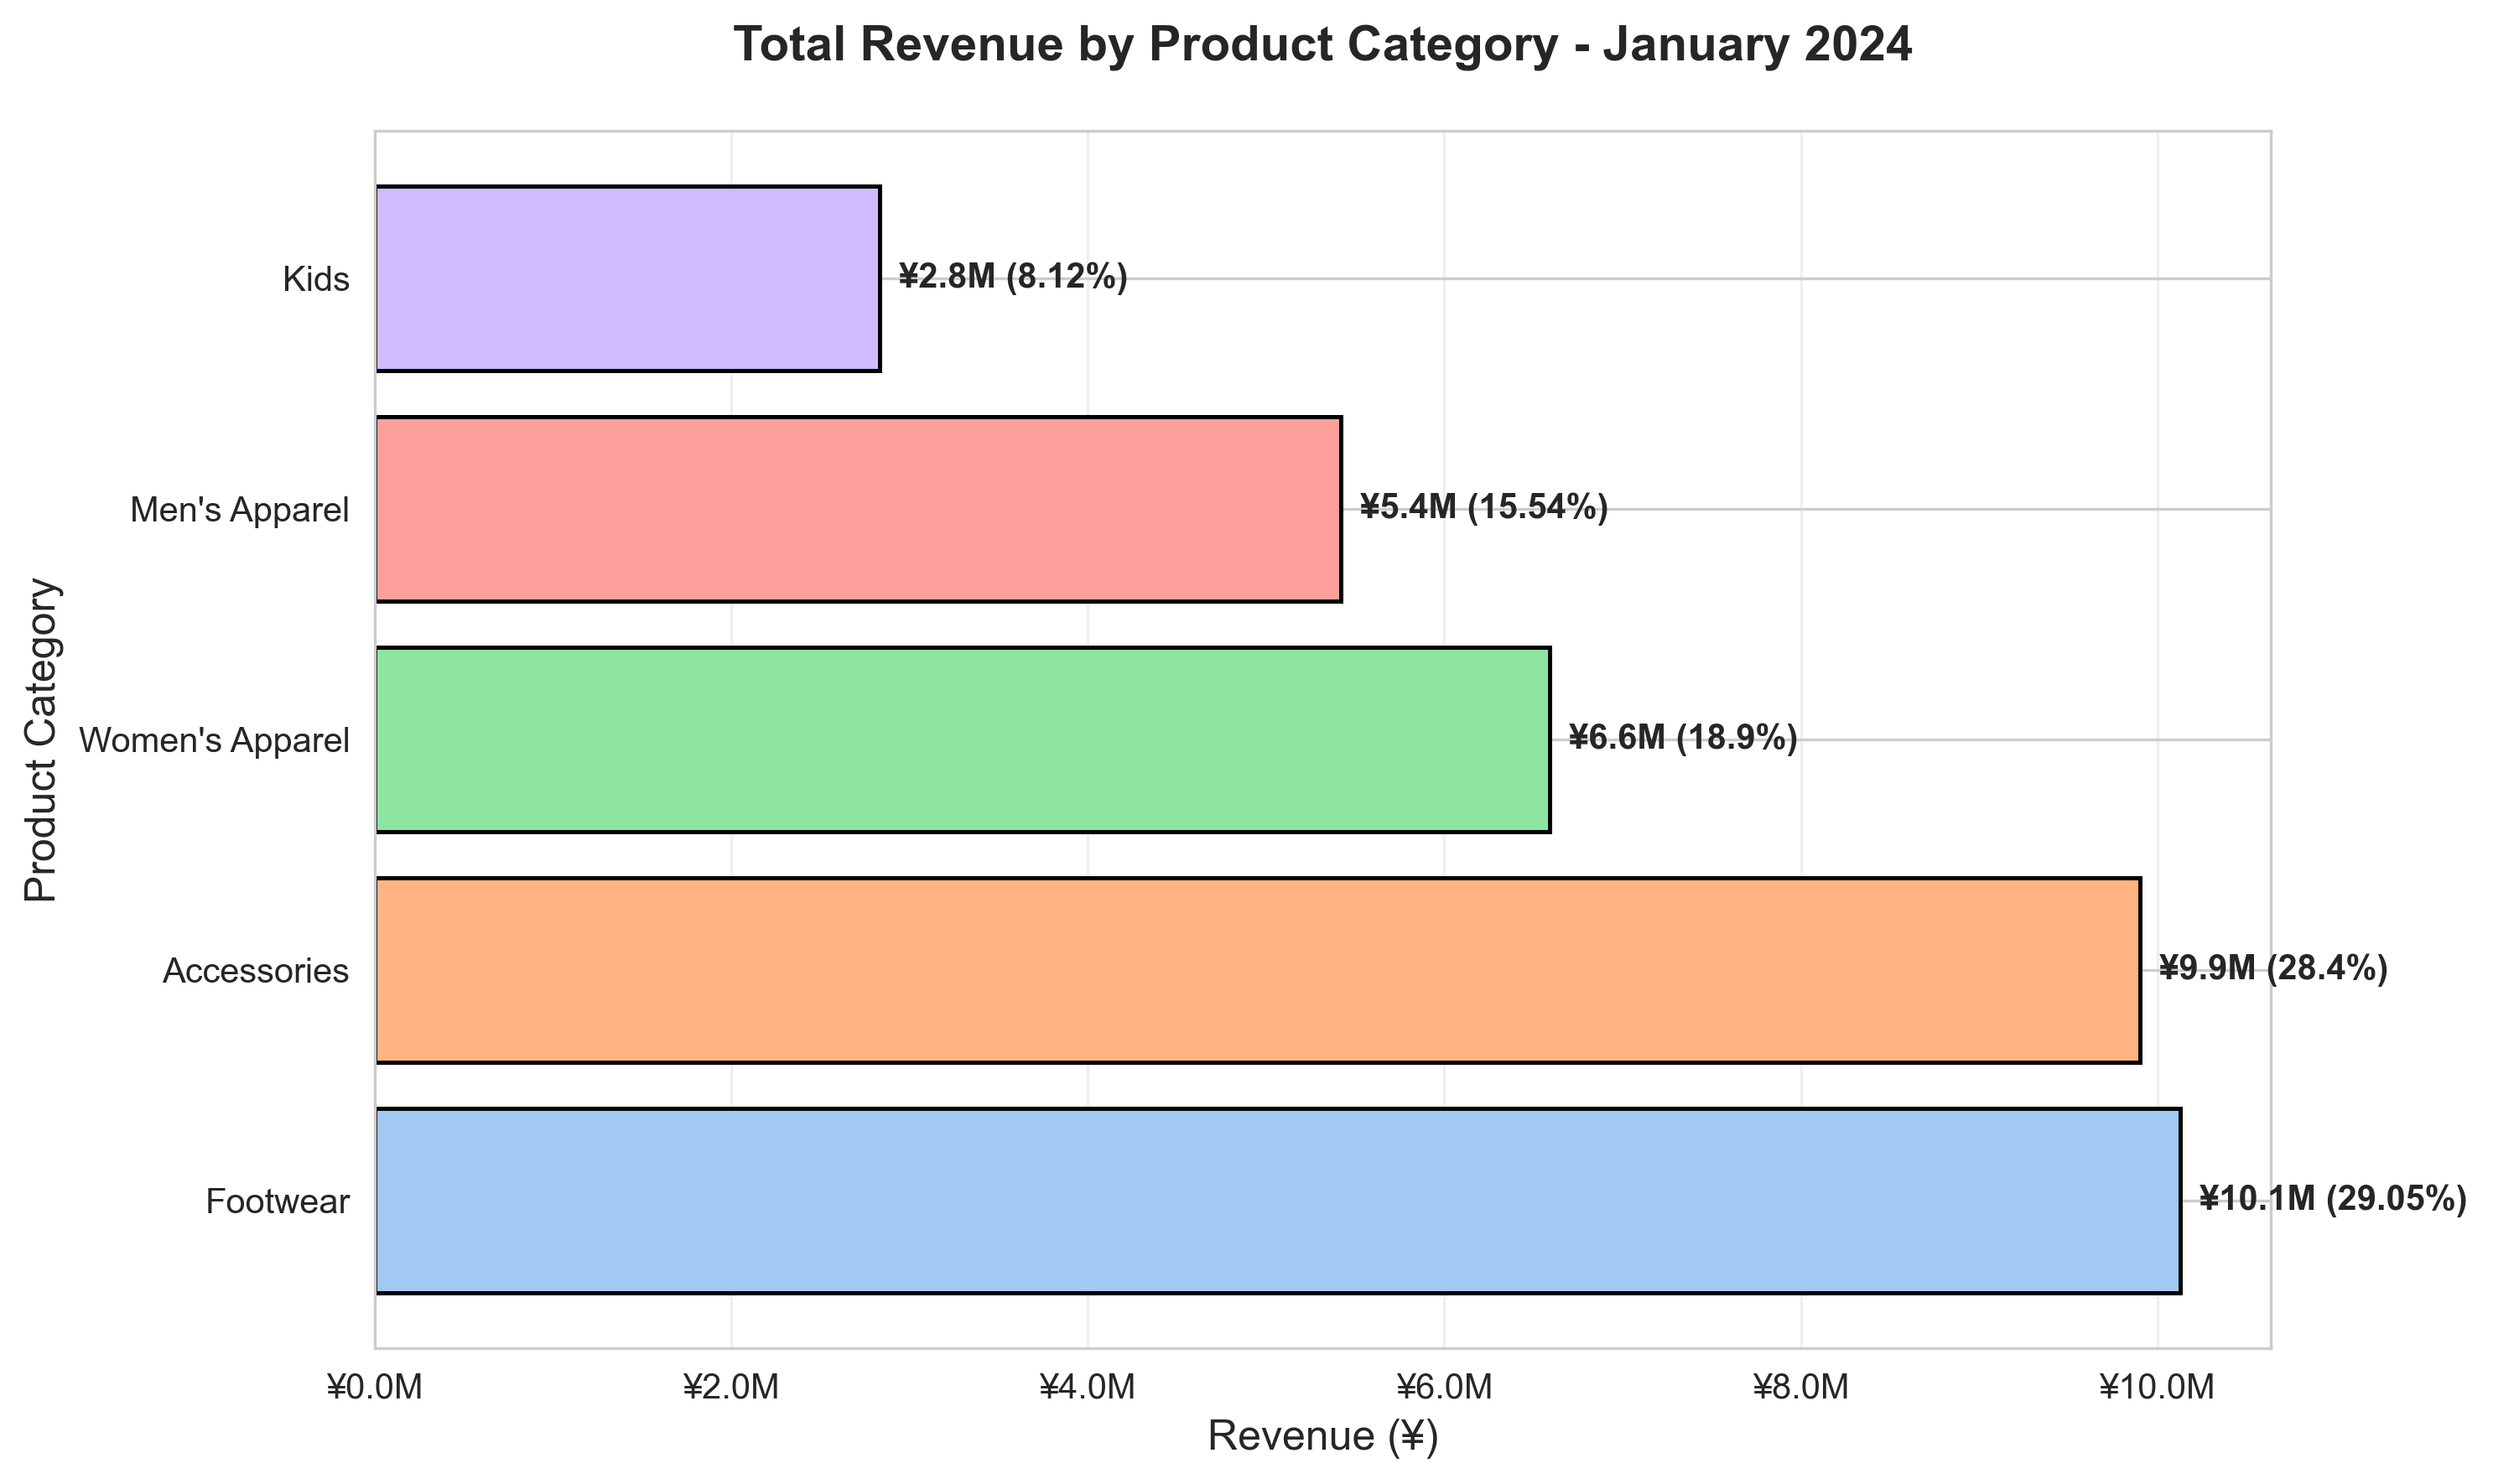

✓ Chart saved: revenue_by_category.png


In [18]:
# Visualization 4: Revenue by Product Category
fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette('pastel', len(category_revenue))
bars = ax.barh(category_revenue['category'], category_revenue['total_revenue'], color=colors, edgecolor='black', linewidth=1.2)

# Add revenue labels
for bar, revenue, pct in zip(bars, category_revenue['total_revenue'], category_revenue['revenue_share_pct']):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
            f'  ¥{revenue/1000000:.1f}M ({pct}%)',
            va='center', fontsize=10, fontweight='bold')

ax.set_title('Total Revenue by Product Category - January 2024', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Revenue (¥)', fontsize=12)
ax.set_ylabel('Product Category', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'¥{x/1000000:.1f}M'))
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(REPORTS_DIR / 'revenue_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved: revenue_by_category.png")

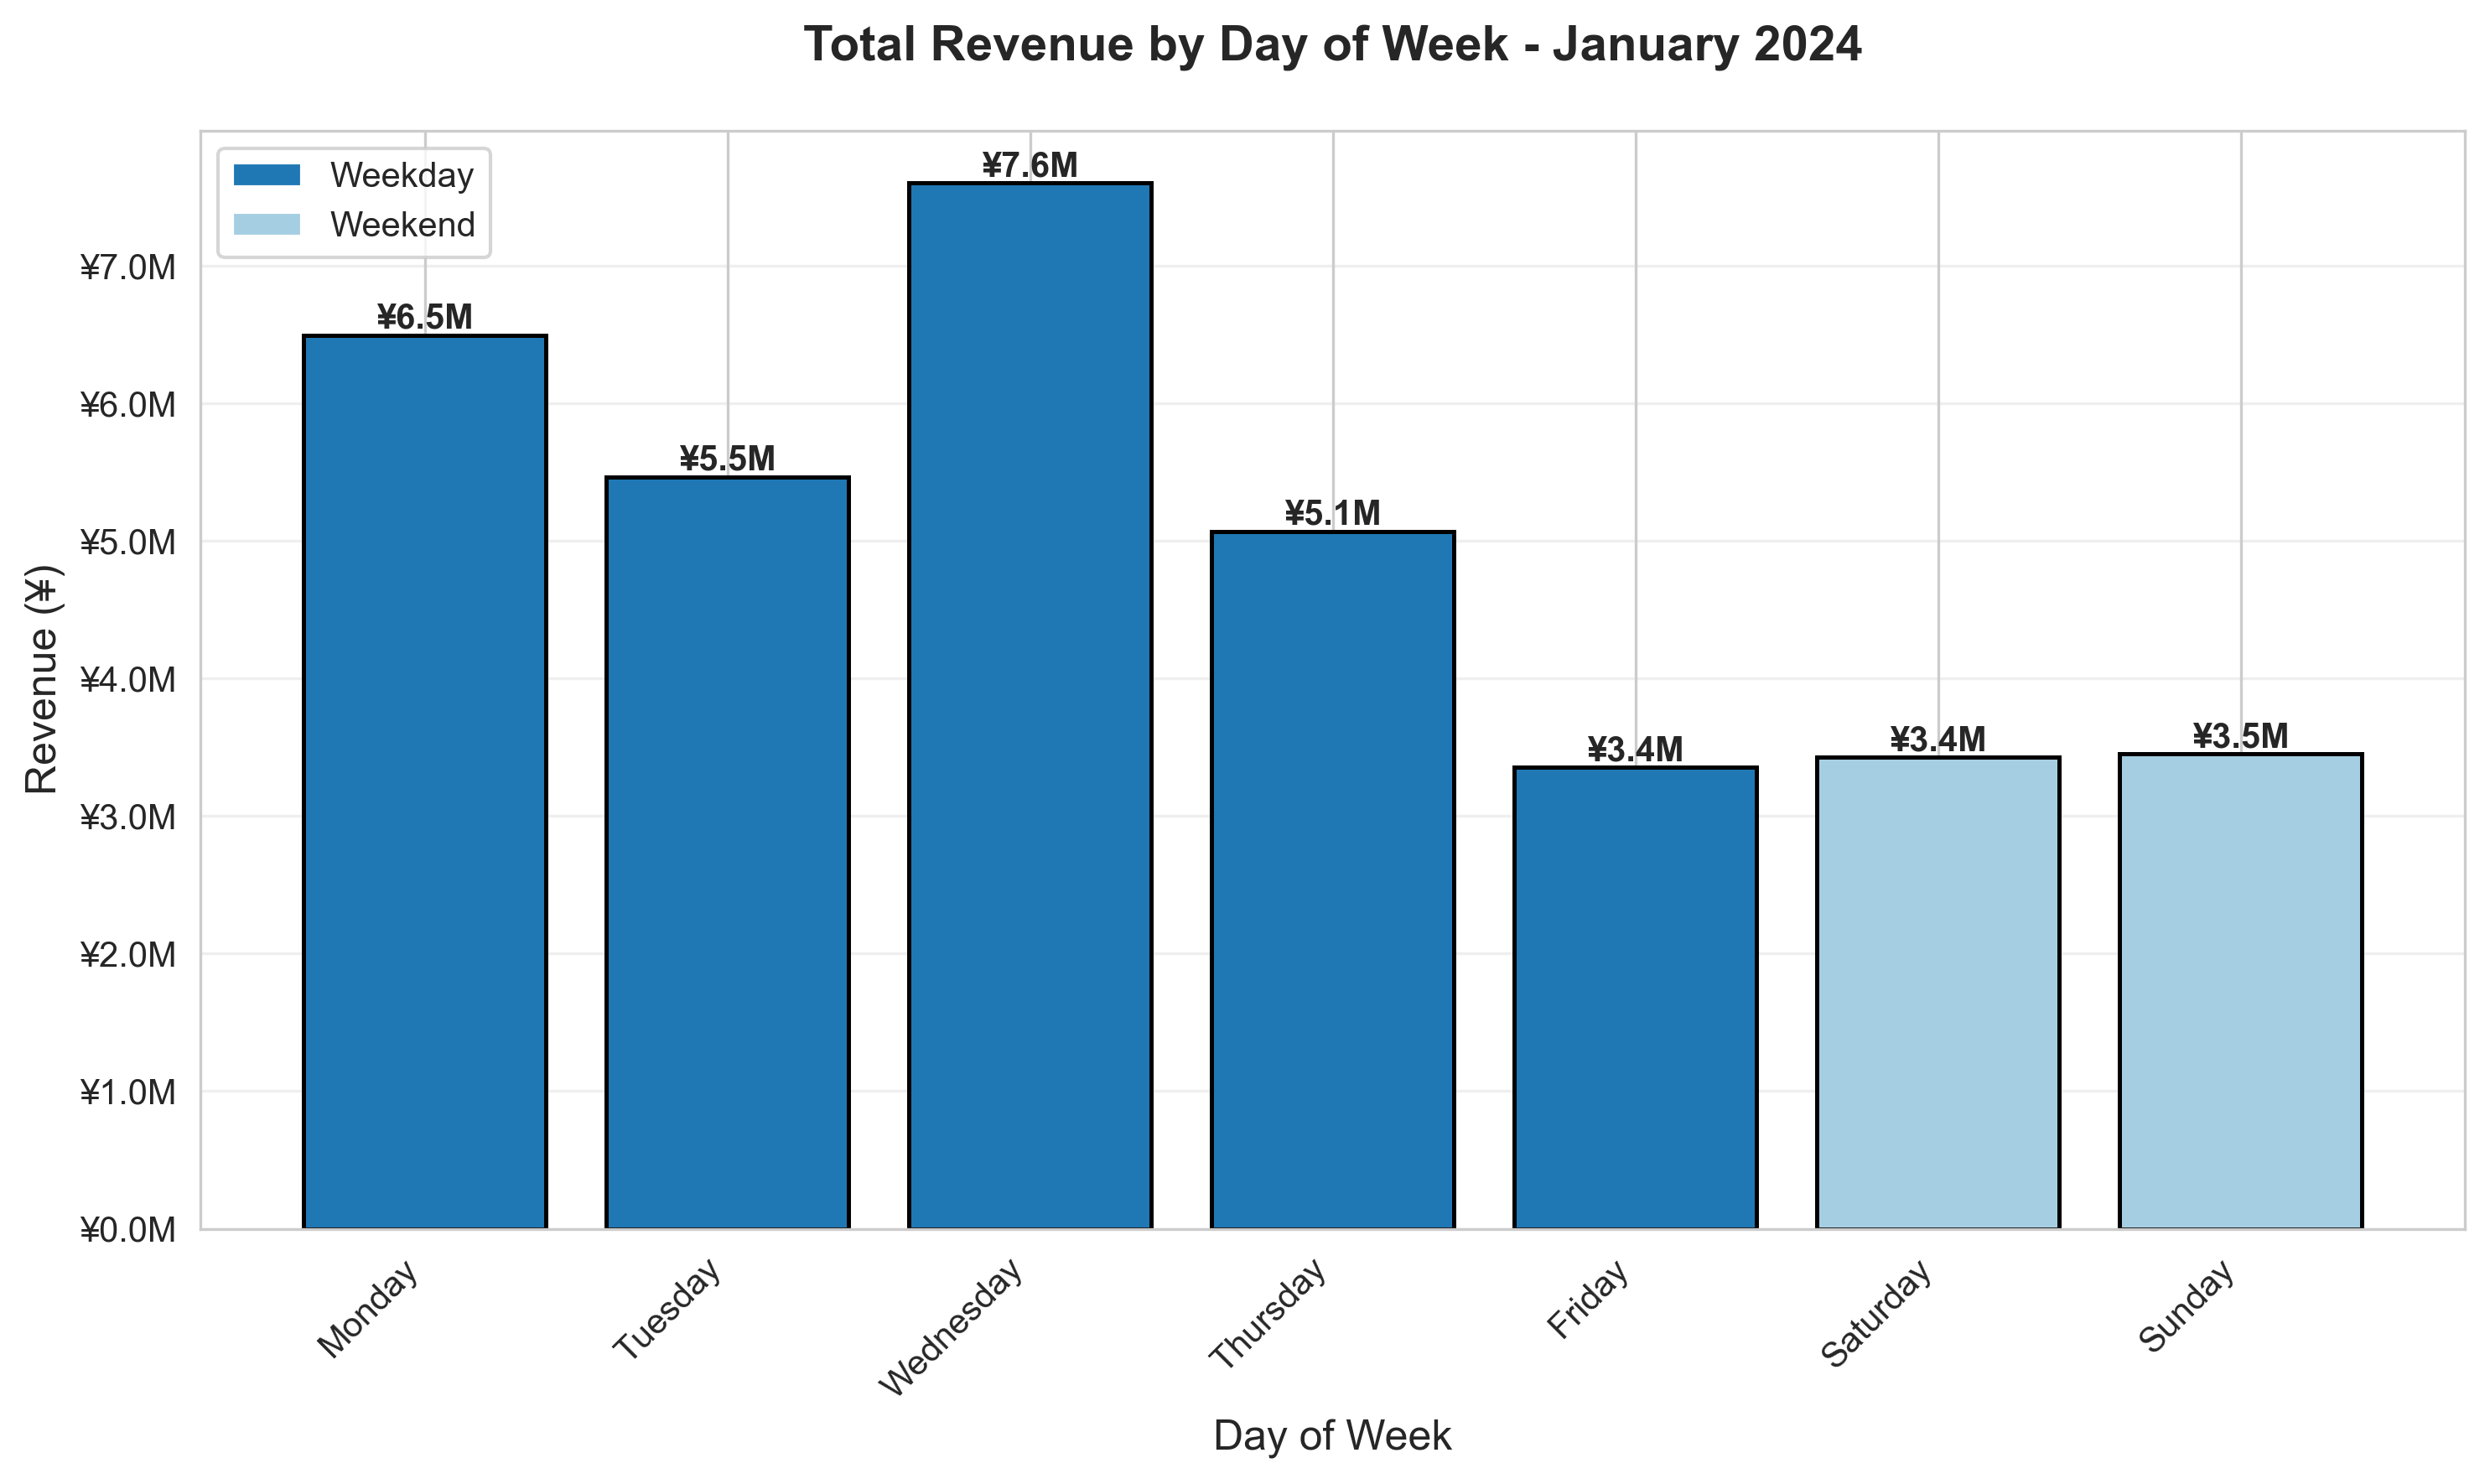

✓ Chart saved: revenue_by_day_of_week.png


In [19]:
# Visualization 5: Revenue by Day of Week
fig, ax = plt.subplots(figsize=(10, 6))

# Color weekends differently
colors = ['#A6CEE3' if day in ['Saturday', 'Sunday'] else '#1F78B4' for day in dow_revenue['day_of_week']]
bars = ax.bar(dow_revenue['day_of_week'], dow_revenue['total_revenue'], color=colors, edgecolor='black', linewidth=1.2)

# Add revenue labels
for bar, revenue in zip(bars, dow_revenue['total_revenue']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'¥{revenue/1000000:.1f}M',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_title('Total Revenue by Day of Week - January 2024', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Revenue (¥)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'¥{x/1000000:.1f}M'))
ax.grid(True, alpha=0.3, axis='y')

# Add legend for weekday vs weekend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#1F78B4', label='Weekday'),
                   Patch(facecolor='#A6CEE3', label='Weekend')]
ax.legend(handles=legend_elements, loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'revenue_by_day_of_week.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved: revenue_by_day_of_week.png")

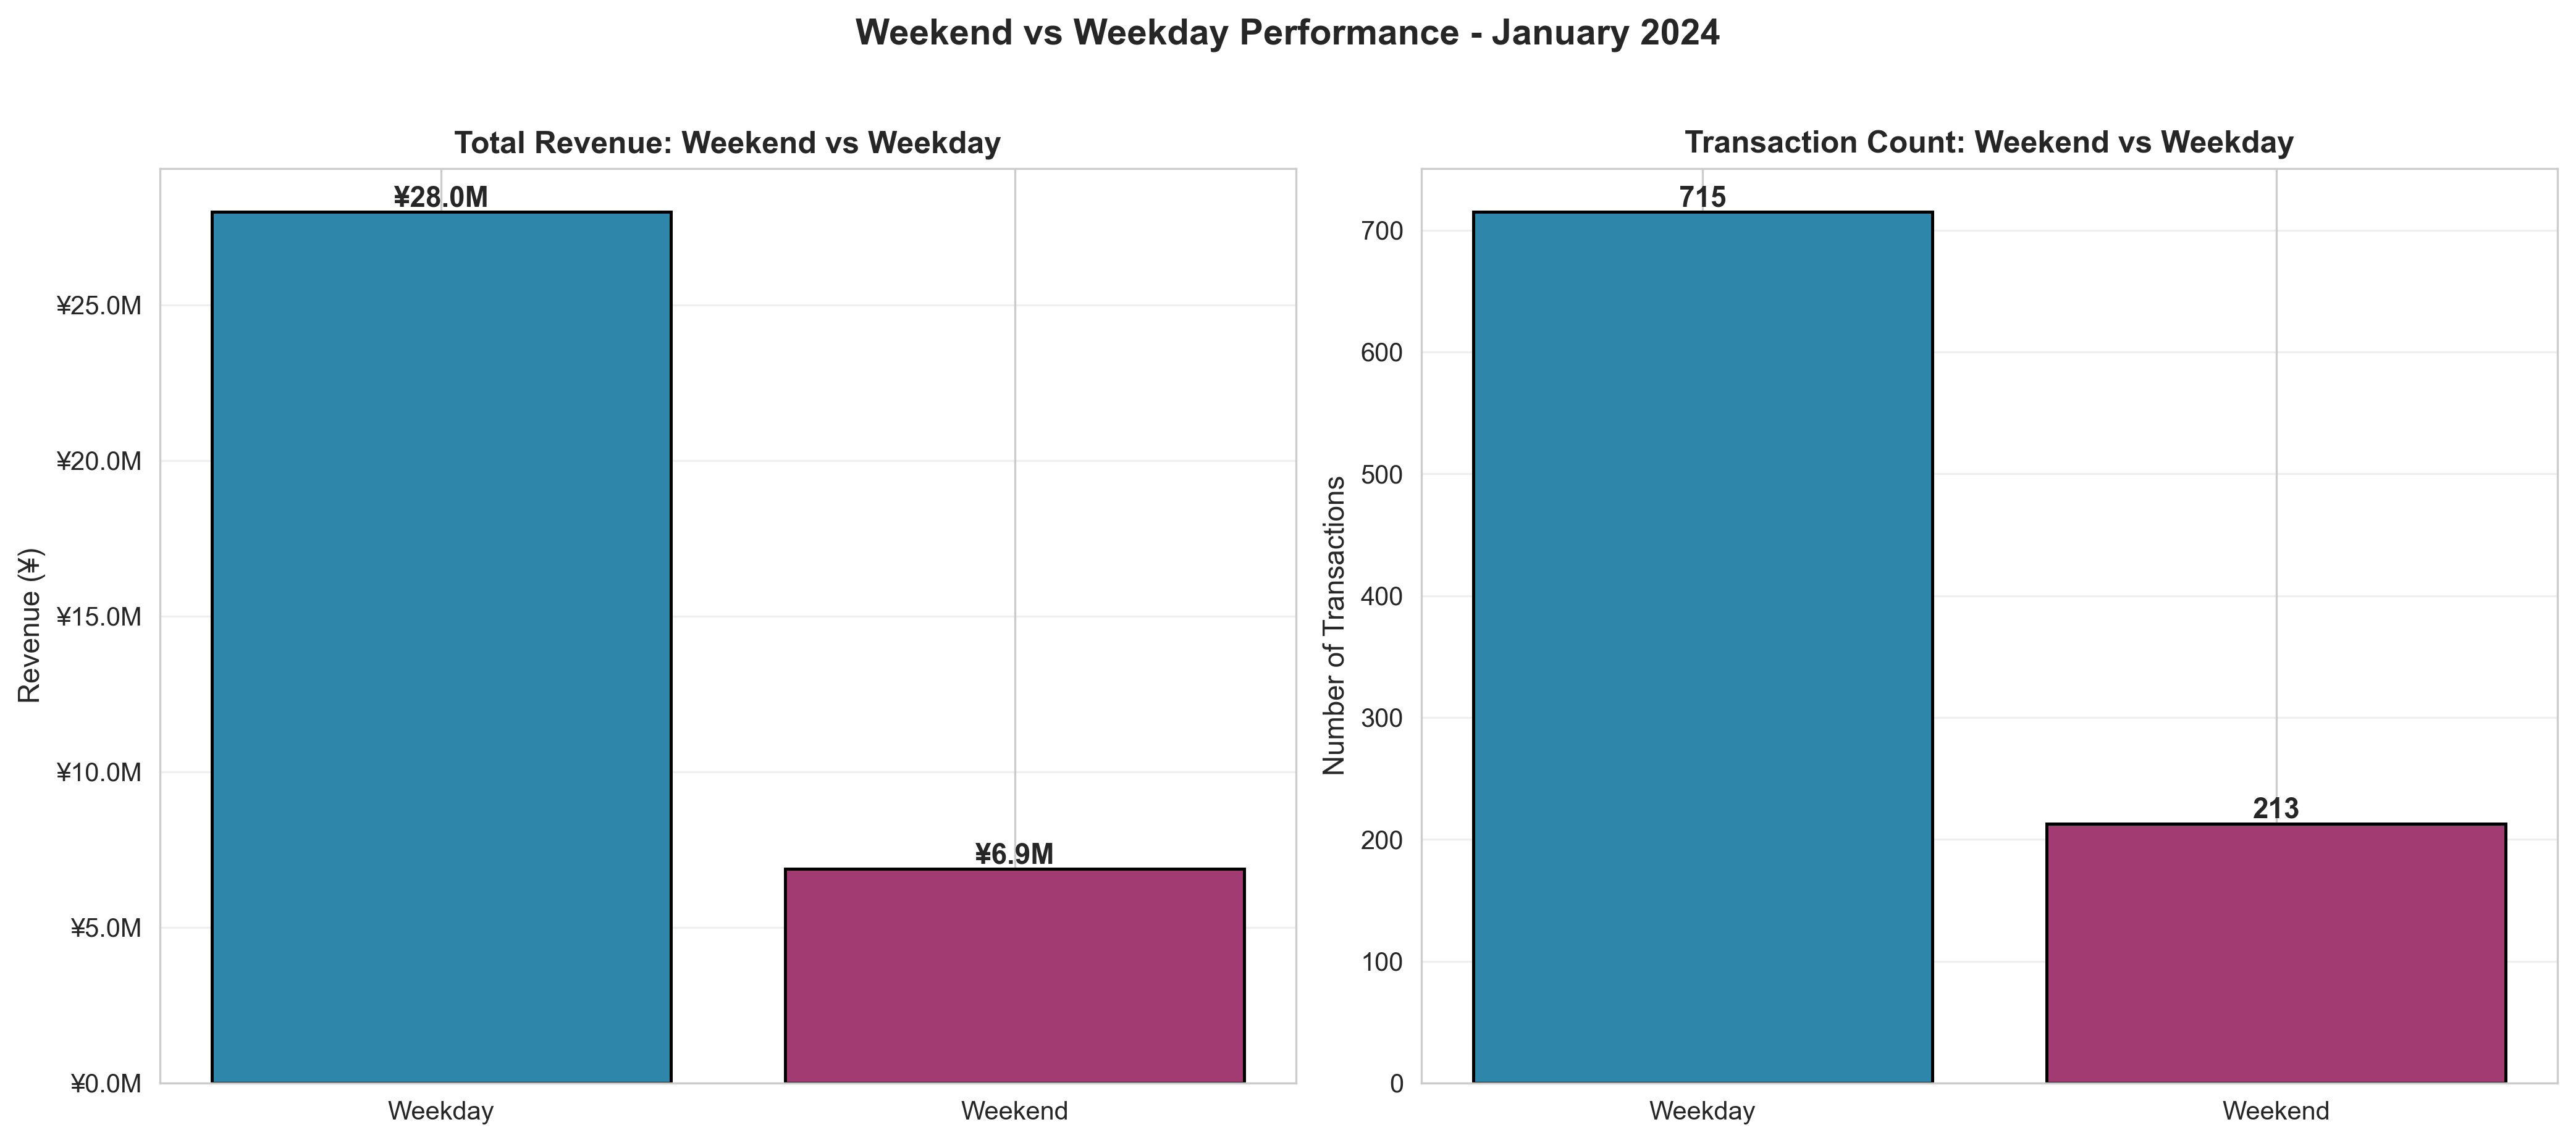

✓ Chart saved: weekend_vs_weekday.png


In [20]:
# Visualization 6: Weekend vs Weekday Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Revenue comparison
colors_1 = ['#2E86AB', '#A23B72']
bars1 = ax1.bar(weekend_comparison['period'], weekend_comparison['total_revenue'], color=colors_1, edgecolor='black', linewidth=1.2)

for bar, revenue in zip(bars1, weekend_comparison['total_revenue']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height,
             f'¥{revenue/1000000:.1f}M',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.set_title('Total Revenue: Weekend vs Weekday', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue (¥)', fontsize=11)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'¥{x/1000000:.1f}M'))
ax1.grid(True, alpha=0.3, axis='y')

# Transaction count comparison
bars2 = ax2.bar(weekend_comparison['period'], weekend_comparison['num_transactions'], color=colors_1, edgecolor='black', linewidth=1.2)

for bar, count in zip(bars2, weekend_comparison['num_transactions']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(count):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_title('Transaction Count: Weekend vs Weekday', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Transactions', fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

fig.suptitle('Weekend vs Weekday Performance - January 2024', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'weekend_vs_weekday.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved: weekend_vs_weekday.png")

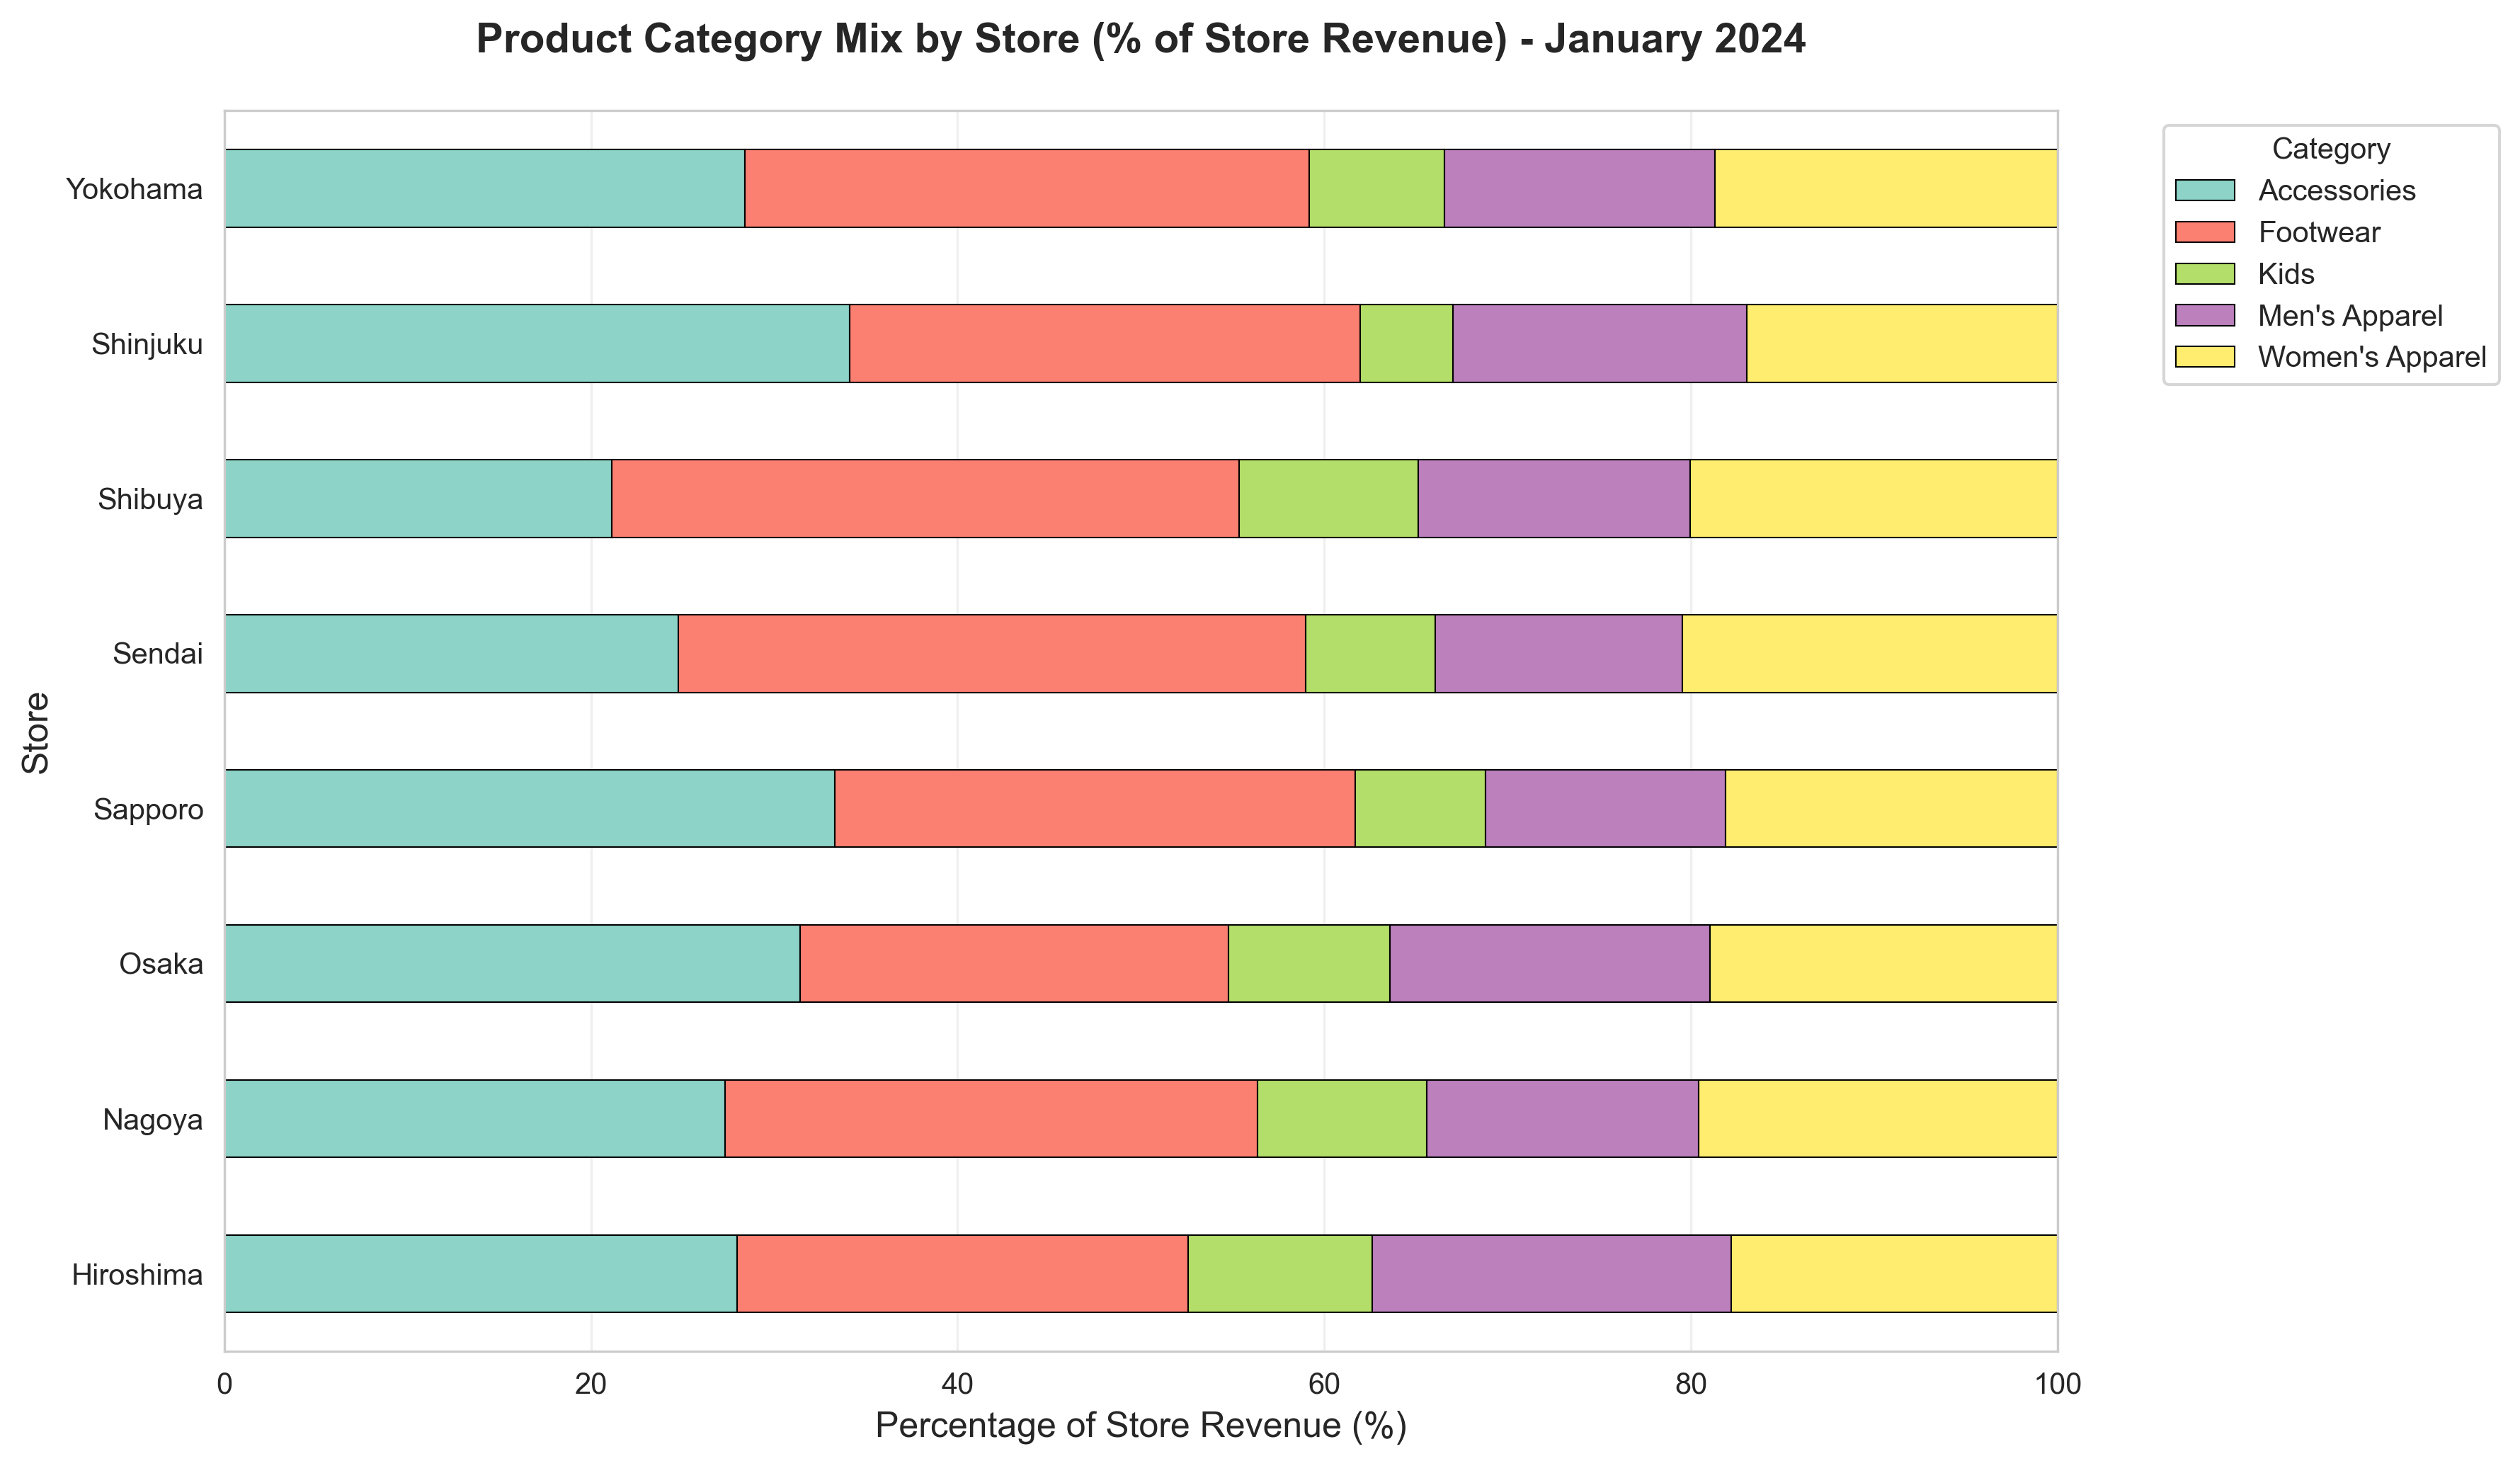

✓ Chart saved: category_mix_by_store.png


In [21]:
# Visualization 7: Category Performance by Store (Stacked Bar)
fig, ax = plt.subplots(figsize=(12, 7))

# Prepare data for stacked bar
category_by_store_pct = category_by_store.div(category_by_store.sum(axis=1), axis=0) * 100

category_by_store_pct.plot(kind='barh', stacked=True, ax=ax, 
                           colormap='Set3', edgecolor='black', linewidth=0.5)

ax.set_title('Product Category Mix by Store (% of Store Revenue) - January 2024', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Percentage of Store Revenue (%)', fontsize=12)
ax.set_ylabel('Store', fontsize=12)
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='x')
ax.set_xlim(0, 100)

plt.tight_layout()
plt.savefig(REPORTS_DIR / 'category_mix_by_store.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved: category_mix_by_store.png")

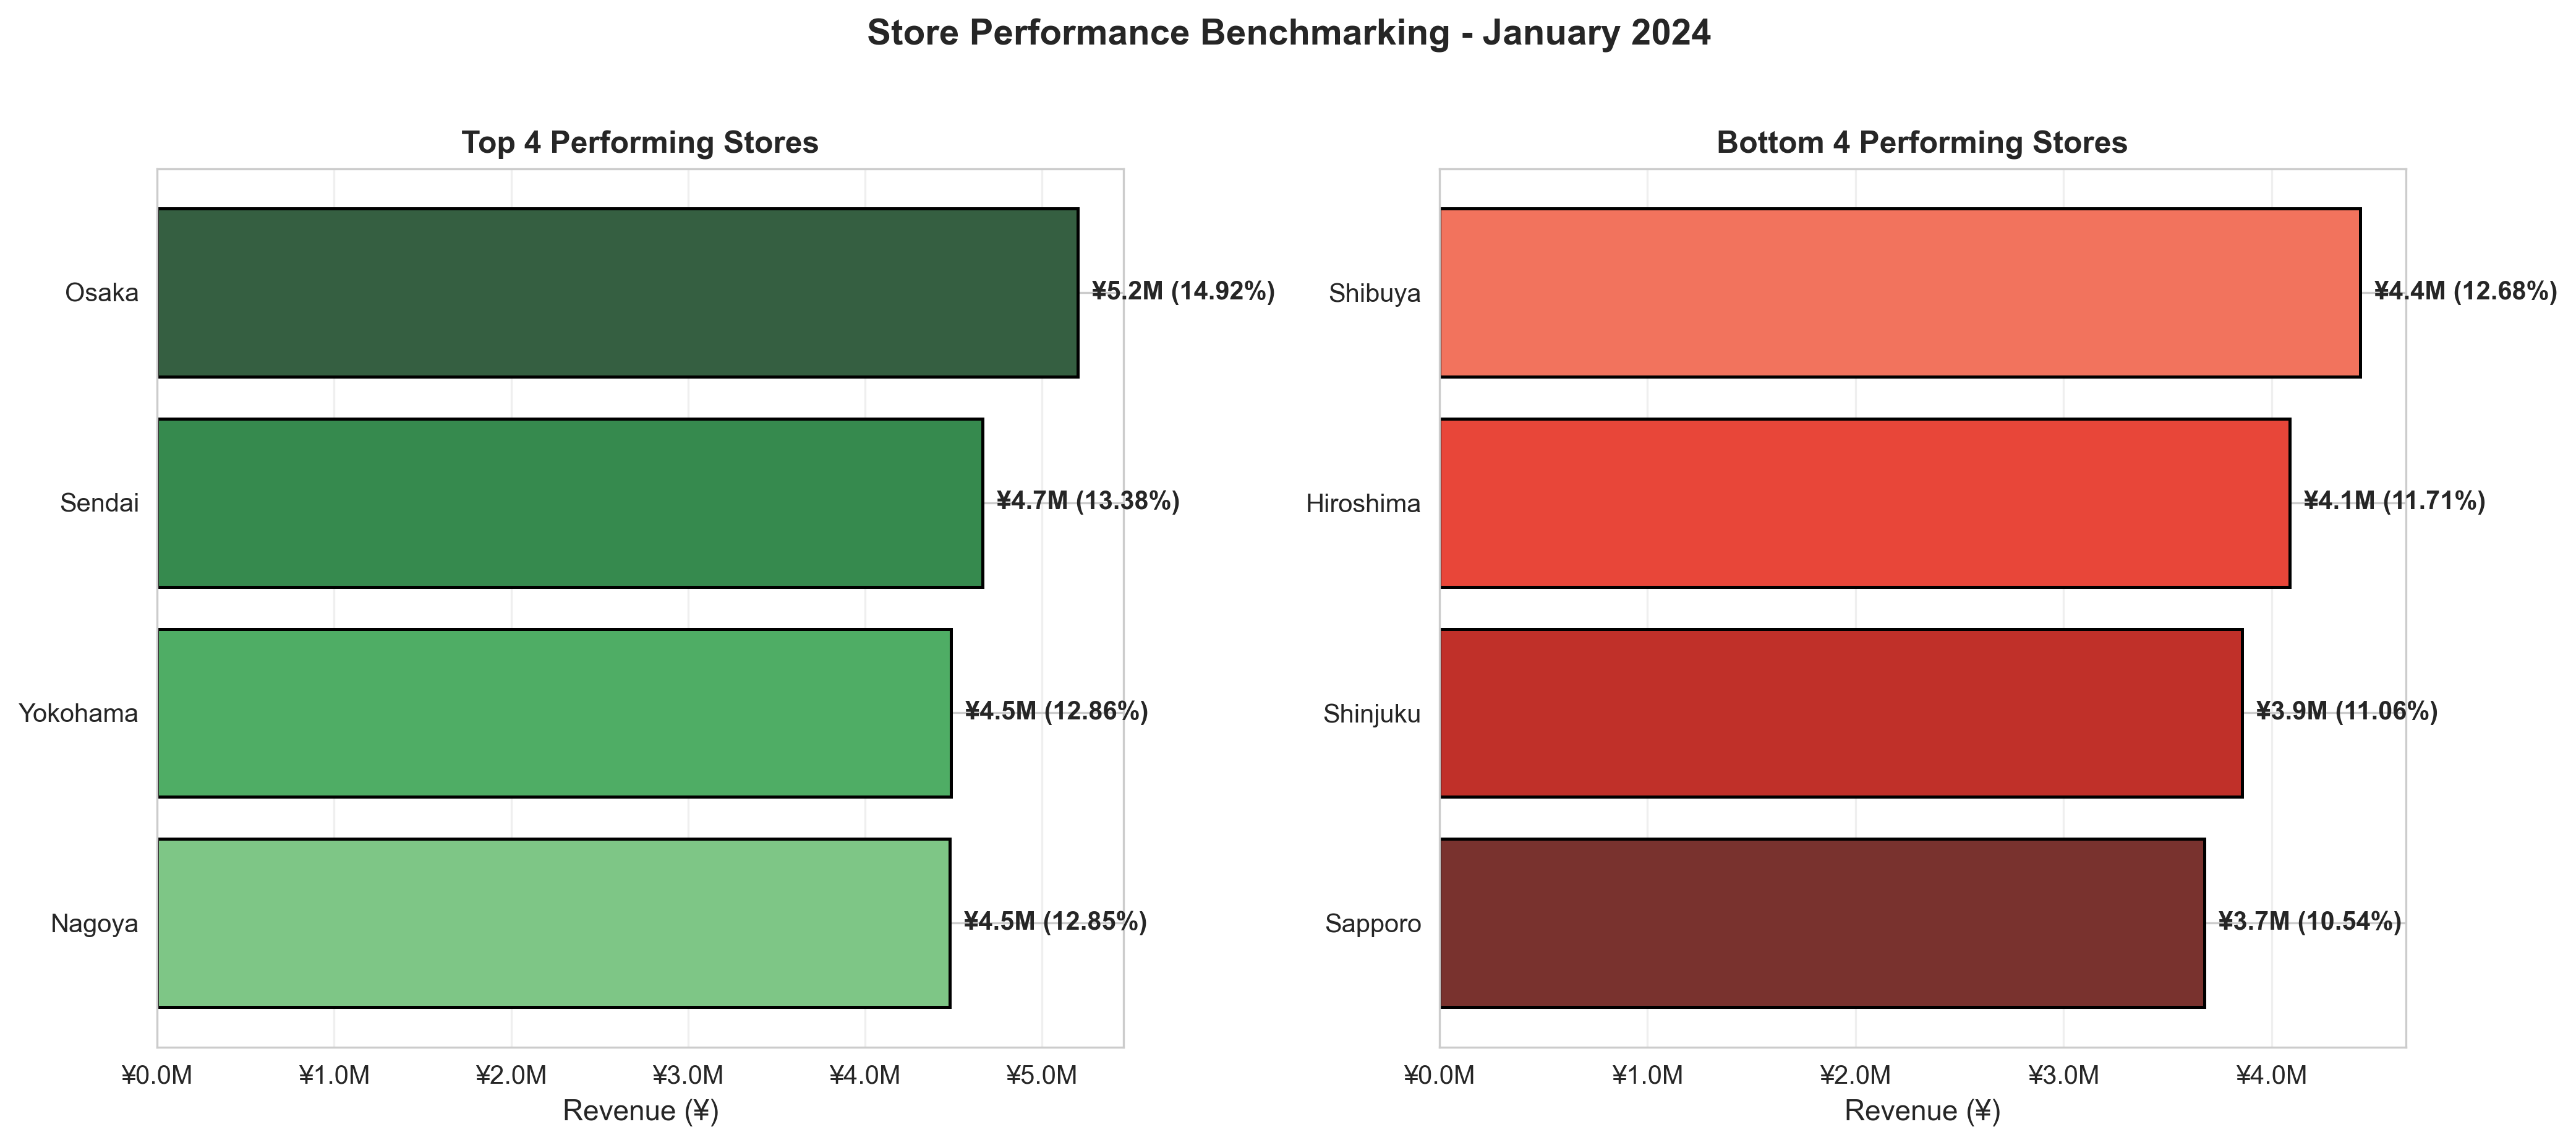

✓ Chart saved: top_bottom_stores.png


In [22]:
# Visualization 8: Top and Bottom Performers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Top 4 stores
top_stores = store_revenue.head(4)
colors_top = sns.color_palette('Greens_d', len(top_stores))[::-1]
bars1 = ax1.barh(top_stores['store_name'], top_stores['total_revenue'], color=colors_top, edgecolor='black', linewidth=1.2)

for bar, revenue, pct in zip(bars1, top_stores['total_revenue'], top_stores['revenue_share_pct']):
    ax1.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'  ¥{revenue/1000000:.1f}M ({pct}%)',
             va='center', fontsize=10, fontweight='bold')

ax1.set_title('Top 4 Performing Stores', fontsize=12, fontweight='bold')
ax1.set_xlabel('Revenue (¥)', fontsize=11)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'¥{x/1000000:.1f}M'))
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# Bottom 4 stores
bottom_stores = store_revenue.tail(4)
colors_bottom = sns.color_palette('Reds_d', len(bottom_stores))
bars2 = ax2.barh(bottom_stores['store_name'], bottom_stores['total_revenue'], color=colors_bottom, edgecolor='black', linewidth=1.2)

for bar, revenue, pct in zip(bars2, bottom_stores['total_revenue'], bottom_stores['revenue_share_pct']):
    ax2.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'  ¥{revenue/1000000:.1f}M ({pct}%)',
             va='center', fontsize=10, fontweight='bold')

ax2.set_title('Bottom 4 Performing Stores', fontsize=12, fontweight='bold')
ax2.set_xlabel('Revenue (¥)', fontsize=11)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'¥{x/1000000:.1f}M'))
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_yaxis()

fig.suptitle('Store Performance Benchmarking - January 2024', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'top_bottom_stores.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved: top_bottom_stores.png")

## 8. Key Insights Summary

Based on the exploratory analysis, here are the preliminary key insights:

In [23]:
# Calculate specific metrics for insights
print("="*80)
print("KEY INSIGHTS - PRELIMINARY FINDINGS")
print("="*80)

# Insight 1: Regional concentration
kanto_revenue = region_revenue[region_revenue['region'] == 'Kanto']['total_revenue'].values[0]
kanto_pct = region_revenue[region_revenue['region'] == 'Kanto']['revenue_share_pct'].values[0]
print(f"\n1. REGIONAL CONCENTRATION")
print(f"   Kanto region generates ¥{kanto_revenue/1000000:.1f}M ({kanto_pct}%) of total revenue")
print(f"   with {region_revenue[region_revenue['region'] == 'Kanto']['num_stores'].values[0]} stores")

# Insight 2: Top store performance
top_store = store_revenue.iloc[0]
print(f"\n2. TOP STORE LEADERSHIP")
print(f"   {top_store['store_name']} leads with ¥{top_store['total_revenue']/1000000:.1f}M ({top_store['revenue_share_pct']}% market share)")
print(f"   Average transaction value: ¥{top_store['avg_transaction']:,.0f}")

# Insight 3: Category dominance
top_category = category_revenue.iloc[0]
print(f"\n3. CATEGORY PERFORMANCE")
print(f"   {top_category['category']} dominates with ¥{top_category['total_revenue']/1000000:.1f}M ({top_category['revenue_share_pct']}%)")
print(f"   {top_category['num_transactions']:,.0f} transactions at ¥{top_category['avg_transaction']:,.0f} average")

# Insight 4: Weekend performance
print(f"\n4. WEEKEND PERFORMANCE LIFT")
print(f"   Weekend daily revenue averages ¥{weekend_avg/1000:.0f}K vs weekday ¥{weekday_avg/1000:.0f}K")
print(f"   Weekend lift: {weekend_lift:+.1f}%")

# Insight 5: Store performance gap
top_store_rev = store_revenue.iloc[0]['total_revenue']
bottom_store_rev = store_revenue.iloc[-1]['total_revenue']
performance_gap = ((top_store_rev - bottom_store_rev) / bottom_store_rev * 100)
print(f"\n5. PERFORMANCE GAP")
print(f"   Top performer ({store_revenue.iloc[0]['store_name']}) generates {performance_gap:.0f}% more")
print(f"   revenue than lowest performer ({store_revenue.iloc[-1]['store_name']})")

print("\n" + "="*80)

KEY INSIGHTS - PRELIMINARY FINDINGS

1. REGIONAL CONCENTRATION
   Kanto region generates ¥12.8M (36.61%) of total revenue
   with 3 stores

2. TOP STORE LEADERSHIP
   Osaka leads with ¥5.2M (14.92% market share)
   Average transaction value: ¥37,976

3. CATEGORY PERFORMANCE
   Footwear dominates with ¥10.1M (29.05%)
   197 transactions at ¥51,421 average

4. WEEKEND PERFORMANCE LIFT
   Weekend daily revenue averages ¥860K vs weekday ¥1217K
   Weekend lift: -29.3%

5. PERFORMANCE GAP
   Top performer (Osaka) generates 42% more
   revenue than lowest performer (Sapporo)



## 9. Recommendations Preview

Preliminary recommendations for Q2 2024:

In [24]:
print("="*80)
print("PRELIMINARY RECOMMENDATIONS FOR Q2 2024")
print("="*80)

print("\n1. WEEKEND OPTIMIZATION")
print(f"   Given {weekend_lift:+.1f}% weekend lift, consider:")
print("   - Extended weekend hours at top performing stores")
print("   - Weekend-specific promotions and events")
print("   - Increased weekend staffing levels")

print("\n2. REGIONAL STRATEGY")
print(f"   Kanto dominance ({kanto_pct}% of revenue) suggests:")
print("   - Invest in underperforming regional stores (best practice sharing)")
print("   - Consider additional Kanto expansion given strong performance")
print("   - Regional marketing campaigns tailored to local preferences")

print("\n3. CATEGORY FOCUS")
print(f"   {top_category['category']} leadership ({top_category['revenue_share_pct']}%) indicates:")
print("   - Expand top category inventory and variety")
print("   - Cross-sell strategies to boost underperforming categories")
print("   - Category-specific seasonal planning for Q2-Q3")

print("\n" + "="*80)

PRELIMINARY RECOMMENDATIONS FOR Q2 2024

1. WEEKEND OPTIMIZATION
   Given -29.3% weekend lift, consider:
   - Extended weekend hours at top performing stores
   - Weekend-specific promotions and events
   - Increased weekend staffing levels

2. REGIONAL STRATEGY
   Kanto dominance (36.61% of revenue) suggests:
   - Invest in underperforming regional stores (best practice sharing)
   - Consider additional Kanto expansion given strong performance
   - Regional marketing campaigns tailored to local preferences

3. CATEGORY FOCUS
   Footwear leadership (29.05%) indicates:
   - Expand top category inventory and variety
   - Cross-sell strategies to boost underperforming categories
   - Category-specific seasonal planning for Q2-Q3



## 10. Data Export for Further Analysis

In [25]:
# Export key summary tables for reporting
store_revenue.to_csv('../reports/store_performance_summary.csv', index=False)
region_revenue.to_csv('../reports/region_performance_summary.csv', index=False)
category_revenue.to_csv('../reports/category_performance_summary.csv', index=False)

print("Summary tables exported to reports/ directory")
print("  - store_performance_summary.csv")
print("  - region_performance_summary.csv")
print("  - category_performance_summary.csv")

Summary tables exported to reports/ directory
  - store_performance_summary.csv
  - region_performance_summary.csv
  - category_performance_summary.csv


## Conclusion

This exploratory data analysis has revealed several actionable insights about January 2024 sales performance across 8 fashion retail stores in Japan:

1. Strong regional concentration in Kanto
2. Clear store performance hierarchy with opportunities for best practice sharing
3. Dominant category performance patterns
4. Significant weekend performance advantage
5. Temporal patterns that can inform staffing and inventory decisions

The next step is to compile these findings into a comprehensive analysis report with specific recommendations for Q2 2024.

---

**Visualizations Created**: 8 high-quality PNG files (300 DPI)

**Next Steps**: Create detailed analysis_report.md and reusable analysis functions